In [1]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import os
import datetime
from pingouin import pairwise_ttests #this is for performing the pairwise tests

%matplotlib inline
plt.style.use('ggplot')

Import the data and check out how the table looks like

In [26]:
f_traffic = pd.read_csv('flight_traffic.csv')
f_traffic.head()

year  month  day airline_id origin_airport destination_airport  \
0  2017      1   31         AA            CLT                 PHX   
1  2017      1   12         AA            FLL                 CLT   
2  2017      1   14         AA            FLL                 CLT   
3  2017      1   18         AA            FLL                 CLT   
4  2017      1   25         AA            FLL                 CLT   

   scheduled_departure  actual_departure  taxi_out  wheels_off  ...  \
0                 1619            1615.0      18.0      1633.0  ...   
1                 1305            1256.0      24.0      1320.0  ...   
2                 1305            1314.0      11.0      1325.0  ...   
3                 1305            1304.0      19.0      1323.0  ...   
4                 1305            1301.0      11.0      1312.0  ...   

   cancelled  diverted  scheduled_elapsed  actual_elapsed  distance  \
0          0         0              277.0           261.0      1773   
1          0         0              123.0           129.0       632   
2          0         0              123.0           108.0       632   
3          0         0              123.0           129.0       632   
4          0         0              123.0           116.0       632   

   airline_delay  weather_delay  air_system_delay  security_delay  \
0            NaN            NaN               NaN             NaN   
1            NaN            NaN               NaN             NaN   
2            NaN            NaN               NaN             NaN   
3            NaN            NaN               NaN             NaN   
4            NaN            NaN               NaN             NaN   

   aircraft_delay  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 24 columns]

In [42]:
f_traffic_delay = f_traffic[['origin_airport','year', 'month', 'day','scheduled_departure', 'airline_delay', 'weather_delay','air_system_delay', 'security_delay', 'aircraft_delay']]

In [43]:
f_traffic_delay = f_traffic_delay[(f_traffic_delay['origin_airport']== 'JFK')| (f_traffic_delay['origin_airport']== 'EWR')|(f_traffic_delay['origin_airport']==  'LGA')]
f_traffic_delay.head()

origin_airport  year  month  day  scheduled_departure  airline_delay  \
225            LGA  2017      1    4                 1556            NaN   
517            LGA  2017      1    4                 1000            NaN   
655            JFK  2017      1   15                 1710            NaN   
656            JFK  2017      1   22                 1710            0.0   
657            JFK  2017      1   30                 1710            NaN   

     weather_delay  air_system_delay  security_delay  aircraft_delay  
225            NaN               NaN             NaN             NaN  
517            NaN               NaN             NaN             NaN  
655            NaN               NaN             NaN             NaN  
656            0.0               0.0             0.0            30.0  
657            NaN               NaN             NaN             NaN

In [44]:
f_traffic_delay['Tdelay'] = f_traffic['airline_delay'] + f_traffic['weather_delay' ]  + f_traffic[ 'air_system_delay'] + f_traffic['security_delay' ] + f_traffic['aircraft_delay' ]

In [45]:
f_traffic_delay.fillna(0, inplace=True)
f_traffic_delay 

origin_airport  year  month  day  scheduled_departure  airline_delay  \
225               LGA  2017      1    4                 1556            0.0   
517               LGA  2017      1    4                 1000            0.0   
655               JFK  2017      1   15                 1710            0.0   
656               JFK  2017      1   22                 1710            0.0   
657               JFK  2017      1   30                 1710            0.0   
...               ...   ...    ...  ...                  ...            ...   
567643            EWR  2017     12   17                 1525            0.0   
567646            EWR  2017     12   17                  959            0.0   
567651            EWR  2017     12   17                 1055            0.0   
567653            EWR  2017     12   17                  945            0.0   
567657            EWR  2017     12   17                 1400            0.0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225               0.0               0.0             0.0             0.0   
517               0.0               0.0             0.0             0.0   
655               0.0               0.0             0.0             0.0   
656               0.0               0.0             0.0            30.0   
657               0.0               0.0             0.0             0.0   
...               ...               ...             ...             ...   
567643            0.0               0.0             0.0             0.0   
567646            0.0               0.0             0.0             0.0   
567651            0.0               0.0             0.0             0.0   
567653            0.0               0.0             0.0             0.0   
567657            0.0               0.0             0.0             0.0   

        Tdelay  
225        0.0  
517        0.0  
655        0.0  
656       30.0  
657        0.0  
...        ...  
567643     0.0  
567646     0.0  
567651     0.0  
567653     0.0  
567657     0.0  

[30457 rows x 11 columns]

In [ ]:
感觉月份没啥trend，可以做hypothesis testing。

In [7]:
f_traffic_delay.isnull().sum()

origin_airport         0
year                   0
month                  0
day                    0
scheduled_departure    0
airline_delay          0
weather_delay          0
air_system_delay       0
security_delay         0
aircraft_delay         0
Tdelay                 0
dtype: int64

In [46]:
f_traffic_delay['date'] = pd.to_datetime(f_traffic_delay[['year', 'month', 'day']])
f_traffic_delay.head()

origin_airport  year  month  day  scheduled_departure  airline_delay  \
225            LGA  2017      1    4                 1556            0.0   
517            LGA  2017      1    4                 1000            0.0   
655            JFK  2017      1   15                 1710            0.0   
656            JFK  2017      1   22                 1710            0.0   
657            JFK  2017      1   30                 1710            0.0   

     weather_delay  air_system_delay  security_delay  aircraft_delay  Tdelay  \
225            0.0               0.0             0.0             0.0     0.0   
517            0.0               0.0             0.0             0.0     0.0   
655            0.0               0.0             0.0             0.0     0.0   
656            0.0               0.0             0.0            30.0    30.0   
657            0.0               0.0             0.0             0.0     0.0   

          date  
225 2017-01-04  
517 2017-01-04  
655 2017-01-15  
656 2017-01-22  
657 2017-01-30

In [47]:
f_traffic_delay['weekday'] = f_traffic_delay['date'].dt.day_name()
f_traffic_delay.head()

origin_airport  year  month  day  scheduled_departure  airline_delay  \
225            LGA  2017      1    4                 1556            0.0   
517            LGA  2017      1    4                 1000            0.0   
655            JFK  2017      1   15                 1710            0.0   
656            JFK  2017      1   22                 1710            0.0   
657            JFK  2017      1   30                 1710            0.0   

     weather_delay  air_system_delay  security_delay  aircraft_delay  Tdelay  \
225            0.0               0.0             0.0             0.0     0.0   
517            0.0               0.0             0.0             0.0     0.0   
655            0.0               0.0             0.0             0.0     0.0   
656            0.0               0.0             0.0            30.0    30.0   
657            0.0               0.0             0.0             0.0     0.0   

          date    weekday  
225 2017-01-04  Wednesday  
517 2017-01-04  Wednesday  
655 2017-01-15     Sunday  
656 2017-01-22     Sunday  
657 2017-01-30     Monday

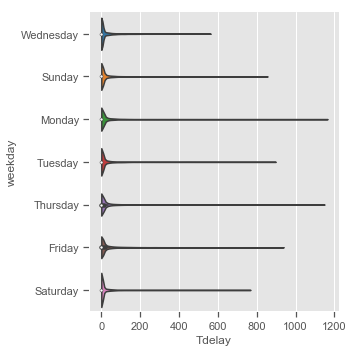

In [10]:
sns.catplot(x="Tdelay",y="weekday", 
            data=f_traffic_delay,
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)
 

In [12]:
# delay frequency for each month
cols = ['airline_delay', 'weather_delay','air_system_delay', 'security_delay', 'aircraft_delay','Tdelay']
Freq_M = f_traffic_delay.groupby('month')[cols].agg({ lambda ts: (ts > 0).sum()})
Freq_M['totalN'] = f_traffic_delay.groupby('month')['Tdelay'].count()

In [13]:
Freq_M.isnull().sum()

airline_delay     <lambda>    0
weather_delay     <lambda>    0
air_system_delay  <lambda>    0
security_delay    <lambda>    0
aircraft_delay    <lambda>    0
Tdelay            <lambda>    0
totalN                        0
dtype: int64

In [14]:
f_traffic_delay[f_traffic_delay['security_delay']>0].groupby('month')['security_delay'].count()

month
1     1
2     1
4     2
5     1
6     2
7     1
8     4
9     1
11    2
Name: security_delay, dtype: int64

In [15]:
cols = ['airline_delay', 'weather_delay','air_system_delay', 'security_delay', 'aircraft_delay','Tdelay']
Freq_Mon=[]
for col in cols:
    Freq_Mon.append( f_traffic_delay[f_traffic_delay[col]>0].groupby('month')[col].count())
Freq_M = pd.concat(Freq_Mon, axis=1)
Freq_M


airline_delay  weather_delay  air_system_delay  security_delay  \
month                                                                   
1                280             63               321             1.0   
2                218             42               239             1.0   
3                391             33               329             NaN   
4                348             23               378             2.0   
5                390              9               398             1.0   
6                419             21               493             2.0   
7                413             28               392             1.0   
8                388             42               452             4.0   
9                193             10               206             1.0   
10               233             12               227             NaN   
11               188              5               218             2.0   
12               324             53               377             NaN   

       aircraft_delay  Tdelay  
month                          
1                 244     548  
2                 216     444  
3                 364     675  
4                 356     678  
5                 367     696  
6                 411     784  
7                 394     716  
8                 357     719  
9                 173     358  
10                238     455  
11                176     377  
12                280     614

In [16]:
Freq_M['totalN'] = f_traffic_delay.groupby('month')['Tdelay'].count()
for col in cols:
       Freq_M[col] = Freq_M[col]/Freq_M['totalN'] 
Freq_M.fillna(0, inplace=True)
Freq_M

airline_delay  weather_delay  air_system_delay  security_delay  \
month                                                                   
1           0.115037       0.025883          0.131882        0.000411   
2           0.096588       0.018609          0.105893        0.000443   
3           0.147714       0.012467          0.124292        0.000000   
4           0.135303       0.008942          0.146967        0.000778   
5           0.150173       0.003466          0.153254        0.000385   
6           0.160168       0.008028          0.188456        0.000765   
7           0.156796       0.010630          0.148823        0.000380   
8           0.141451       0.015312          0.164783        0.001458   
9           0.079196       0.004103          0.084530        0.000410   
10          0.090803       0.004677          0.088465        0.000000   
11          0.076237       0.002028          0.088402        0.000811   
12          0.130225       0.021302          0.151527        0.000000   

       aircraft_delay    Tdelay  totalN  
month                                    
1            0.100247  0.225144    2434  
2            0.095702  0.196721    2257  
3            0.137514  0.255006    2647  
4            0.138414  0.263608    2572  
5            0.141317  0.268002    2597  
6            0.157110  0.299694    2616  
7            0.149582  0.271830    2634  
8            0.130149  0.262122    2743  
9            0.070989  0.146902    2437  
10           0.092751  0.177319    2566  
11           0.071371  0.152879    2466  
12           0.112540  0.246785    2488

In [17]:
del Freq_M['totalN']

Text(0, 0.5, 'Delay Percentage')

<Figure size 432x288 with 0 Axes>

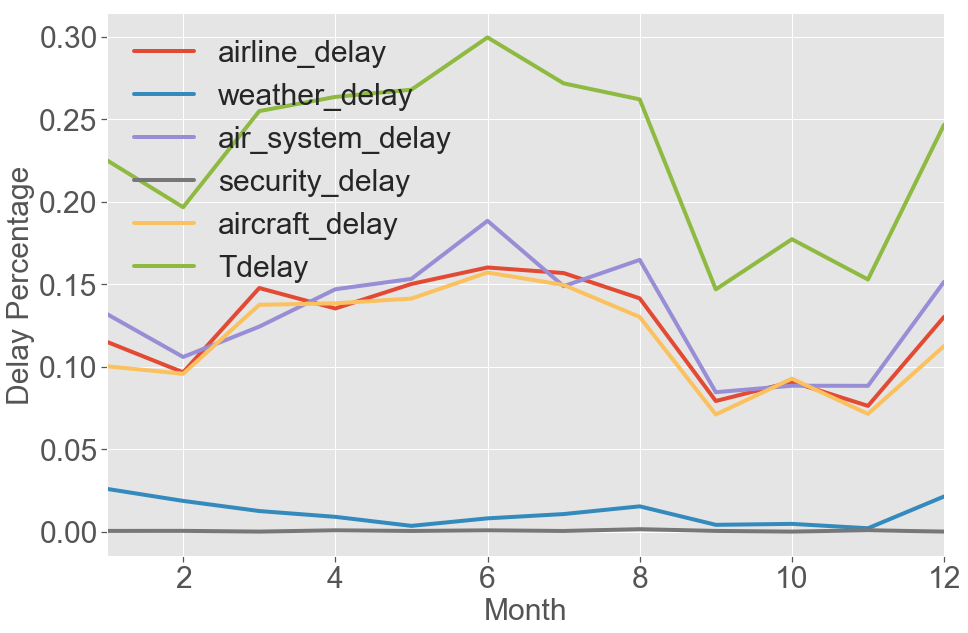

In [18]:
plt.figure(  ); Freq_M.plot(figsize=(15,10), fontsize =30,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =30)# ratio
plt.xlabel('Month', fontsize=30)
plt.ylabel('Delay Percentage', fontsize=30)

you can not use the dataframe after goupby as you only have only one data point. In this case, we should make a data frame with zero and 1 
and then test it

In [48]:
f_traffic_delay

origin_airport  year  month  day  scheduled_departure  airline_delay  \
225               LGA  2017      1    4                 1556            0.0   
517               LGA  2017      1    4                 1000            0.0   
655               JFK  2017      1   15                 1710            0.0   
656               JFK  2017      1   22                 1710            0.0   
657               JFK  2017      1   30                 1710            0.0   
...               ...   ...    ...  ...                  ...            ...   
567643            EWR  2017     12   17                 1525            0.0   
567646            EWR  2017     12   17                  959            0.0   
567651            EWR  2017     12   17                 1055            0.0   
567653            EWR  2017     12   17                  945            0.0   
567657            EWR  2017     12   17                 1400            0.0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225               0.0               0.0             0.0             0.0   
517               0.0               0.0             0.0             0.0   
655               0.0               0.0             0.0             0.0   
656               0.0               0.0             0.0            30.0   
657               0.0               0.0             0.0             0.0   
...               ...               ...             ...             ...   
567643            0.0               0.0             0.0             0.0   
567646            0.0               0.0             0.0             0.0   
567651            0.0               0.0             0.0             0.0   
567653            0.0               0.0             0.0             0.0   
567657            0.0               0.0             0.0             0.0   

        Tdelay       date    weekday  
225        0.0 2017-01-04  Wednesday  
517        0.0 2017-01-04  Wednesday  
655        0.0 2017-01-15     Sunday  
656       30.0 2017-01-22     Sunday  
657        0.0 2017-01-30     Monday  
...        ...        ...        ...  
567643     0.0 2017-12-17     Sunday  
567646     0.0 2017-12-17     Sunday  
567651     0.0 2017-12-17     Sunday  
567653     0.0 2017-12-17     Sunday  
567657     0.0 2017-12-17     Sunday  

[30457 rows x 13 columns]

In [38]:
cols = ['airline_delay', 'weather_delay','air_system_delay', 'security_delay', 'aircraft_delay','Tdelay']
delay = f_traffic_delay
for col in cols:
    delay[col] = f_traffic_delay[col].astype(bool).astype(int)
delay

origin_airport  year  month  day  scheduled_departure  airline_delay  \
225               LGA  2017      1    4                 1556              0   
517               LGA  2017      1    4                 1000              0   
655               JFK  2017      1   15                 1710              0   
656                 1     1      1    1                    1              1   
657               JFK  2017      1   30                 1710              0   
...               ...   ...    ...  ...                  ...            ...   
567643            EWR  2017     12   17                 1525              0   
567646            EWR  2017     12   17                  959              0   
567651            EWR  2017     12   17                 1055              0   
567653            EWR  2017     12   17                  945              0   
567657            EWR  2017     12   17                 1400              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 1                 1               1               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay                 date  
225          0  2017-01-04 00:00:00  
517          0  2017-01-04 00:00:00  
655          0  2017-01-15 00:00:00  
656          1                    1  
657          0  2017-01-30 00:00:00  
...        ...                  ...  
567643       0  2017-12-17 00:00:00  
567646       0  2017-12-17 00:00:00  
567651       0  2017-12-17 00:00:00  
567653       0  2017-12-17 00:00:00  
567657       0  2017-12-17 00:00:00  

[30457 rows x 12 columns]

In [64]:
delay = f_traffic_delay
delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4            15:56:00              0   
517               LGA  2017      1    4            10:00:00              0   
655               JFK  2017      1   15            17:10:00              0   
656               JFK  2017      1   22            17:10:00              0   
657               JFK  2017      1   30            17:10:00              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17            15:25:00              0   
567646            EWR  2017     12   17            09:59:00              0   
567651            EWR  2017     12   17            10:55:00              0   
567653            EWR  2017     12   17            09:45:00              0   
567657            EWR  2017     12   17            14:00:00              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  hour  season  
225        0.0 2017-01-04  Wednesday         3    15       1  
517        0.0 2017-01-04  Wednesday         3    10       1  
655        0.0 2017-01-15     Sunday         7    17       1  
656       30.0 2017-01-22     Sunday         7    17       1  
657        0.0 2017-01-30     Monday         1    17       1  
...        ...        ...        ...       ...   ...     ...  
567643     0.0 2017-12-17     Sunday         7    15       1  
567646     0.0 2017-12-17     Sunday         7     9       1  
567651     0.0 2017-12-17     Sunday         7    10       1  
567653     0.0 2017-12-17     Sunday         7     9       1  
567657     0.0 2017-12-17     Sunday         7    14       1  

[30457 rows x 16 columns]

In [65]:
delay['airline_delay'] = f_traffic_delay['airline_delay'].astype(bool).astype(int)
delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4            15:56:00              0   
517               LGA  2017      1    4            10:00:00              0   
655               JFK  2017      1   15            17:10:00              0   
656               JFK  2017      1   22            17:10:00              0   
657               JFK  2017      1   30            17:10:00              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17            15:25:00              0   
567646            EWR  2017     12   17            09:59:00              0   
567651            EWR  2017     12   17            10:55:00              0   
567653            EWR  2017     12   17            09:45:00              0   
567657            EWR  2017     12   17            14:00:00              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  hour  season  
225        0.0 2017-01-04  Wednesday         3    15       1  
517        0.0 2017-01-04  Wednesday         3    10       1  
655        0.0 2017-01-15     Sunday         7    17       1  
656       30.0 2017-01-22     Sunday         7    17       1  
657        0.0 2017-01-30     Monday         1    17       1  
...        ...        ...        ...       ...   ...     ...  
567643     0.0 2017-12-17     Sunday         7    15       1  
567646     0.0 2017-12-17     Sunday         7     9       1  
567651     0.0 2017-12-17     Sunday         7    10       1  
567653     0.0 2017-12-17     Sunday         7     9       1  
567657     0.0 2017-12-17     Sunday         7    14       1  

[30457 rows x 16 columns]

In [51]:
delay['airline_delay'].unique()

array([0, 1], dtype=int64)

In [66]:
delay['weather_delay'] = f_traffic_delay['weather_delay'].astype(bool).astype(int)
delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4            15:56:00              0   
517               LGA  2017      1    4            10:00:00              0   
655               JFK  2017      1   15            17:10:00              0   
656               JFK  2017      1   22            17:10:00              0   
657               JFK  2017      1   30            17:10:00              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17            15:25:00              0   
567646            EWR  2017     12   17            09:59:00              0   
567651            EWR  2017     12   17            10:55:00              0   
567653            EWR  2017     12   17            09:45:00              0   
567657            EWR  2017     12   17            14:00:00              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  hour  season  
225        0.0 2017-01-04  Wednesday         3    15       1  
517        0.0 2017-01-04  Wednesday         3    10       1  
655        0.0 2017-01-15     Sunday         7    17       1  
656       30.0 2017-01-22     Sunday         7    17       1  
657        0.0 2017-01-30     Monday         1    17       1  
...        ...        ...        ...       ...   ...     ...  
567643     0.0 2017-12-17     Sunday         7    15       1  
567646     0.0 2017-12-17     Sunday         7     9       1  
567651     0.0 2017-12-17     Sunday         7    10       1  
567653     0.0 2017-12-17     Sunday         7     9       1  
567657     0.0 2017-12-17     Sunday         7    14       1  

[30457 rows x 16 columns]

In [67]:
delay['air_system_delay'] = f_traffic_delay['air_system_delay'].astype(bool).astype(int)
delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4            15:56:00              0   
517               LGA  2017      1    4            10:00:00              0   
655               JFK  2017      1   15            17:10:00              0   
656               JFK  2017      1   22            17:10:00              0   
657               JFK  2017      1   30            17:10:00              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17            15:25:00              0   
567646            EWR  2017     12   17            09:59:00              0   
567651            EWR  2017     12   17            10:55:00              0   
567653            EWR  2017     12   17            09:45:00              0   
567657            EWR  2017     12   17            14:00:00              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  hour  season  
225        0.0 2017-01-04  Wednesday         3    15       1  
517        0.0 2017-01-04  Wednesday         3    10       1  
655        0.0 2017-01-15     Sunday         7    17       1  
656       30.0 2017-01-22     Sunday         7    17       1  
657        0.0 2017-01-30     Monday         1    17       1  
...        ...        ...        ...       ...   ...     ...  
567643     0.0 2017-12-17     Sunday         7    15       1  
567646     0.0 2017-12-17     Sunday         7     9       1  
567651     0.0 2017-12-17     Sunday         7    10       1  
567653     0.0 2017-12-17     Sunday         7     9       1  
567657     0.0 2017-12-17     Sunday         7    14       1  

[30457 rows x 16 columns]

In [68]:
delay['security_delay'] = f_traffic_delay['security_delay'].astype(bool).astype(int)
delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4            15:56:00              0   
517               LGA  2017      1    4            10:00:00              0   
655               JFK  2017      1   15            17:10:00              0   
656               JFK  2017      1   22            17:10:00              0   
657               JFK  2017      1   30            17:10:00              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17            15:25:00              0   
567646            EWR  2017     12   17            09:59:00              0   
567651            EWR  2017     12   17            10:55:00              0   
567653            EWR  2017     12   17            09:45:00              0   
567657            EWR  2017     12   17            14:00:00              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  hour  season  
225        0.0 2017-01-04  Wednesday         3    15       1  
517        0.0 2017-01-04  Wednesday         3    10       1  
655        0.0 2017-01-15     Sunday         7    17       1  
656       30.0 2017-01-22     Sunday         7    17       1  
657        0.0 2017-01-30     Monday         1    17       1  
...        ...        ...        ...       ...   ...     ...  
567643     0.0 2017-12-17     Sunday         7    15       1  
567646     0.0 2017-12-17     Sunday         7     9       1  
567651     0.0 2017-12-17     Sunday         7    10       1  
567653     0.0 2017-12-17     Sunday         7     9       1  
567657     0.0 2017-12-17     Sunday         7    14       1  

[30457 rows x 16 columns]

In [69]:
delay['aircraft_delay'] = f_traffic_delay['aircraft_delay'].astype(bool).astype(int)
delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4            15:56:00              0   
517               LGA  2017      1    4            10:00:00              0   
655               JFK  2017      1   15            17:10:00              0   
656               JFK  2017      1   22            17:10:00              0   
657               JFK  2017      1   30            17:10:00              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17            15:25:00              0   
567646            EWR  2017     12   17            09:59:00              0   
567651            EWR  2017     12   17            10:55:00              0   
567653            EWR  2017     12   17            09:45:00              0   
567657            EWR  2017     12   17            14:00:00              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  hour  season  
225        0.0 2017-01-04  Wednesday         3    15       1  
517        0.0 2017-01-04  Wednesday         3    10       1  
655        0.0 2017-01-15     Sunday         7    17       1  
656       30.0 2017-01-22     Sunday         7    17       1  
657        0.0 2017-01-30     Monday         1    17       1  
...        ...        ...        ...       ...   ...     ...  
567643     0.0 2017-12-17     Sunday         7    15       1  
567646     0.0 2017-12-17     Sunday         7     9       1  
567651     0.0 2017-12-17     Sunday         7    10       1  
567653     0.0 2017-12-17     Sunday         7     9       1  
567657     0.0 2017-12-17     Sunday         7    14       1  

[30457 rows x 16 columns]

In [70]:
delay['Tdelay'] = f_traffic_delay['Tdelay'].astype(bool).astype(int)
delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4            15:56:00              0   
517               LGA  2017      1    4            10:00:00              0   
655               JFK  2017      1   15            17:10:00              0   
656               JFK  2017      1   22            17:10:00              0   
657               JFK  2017      1   30            17:10:00              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17            15:25:00              0   
567646            EWR  2017     12   17            09:59:00              0   
567651            EWR  2017     12   17            10:55:00              0   
567653            EWR  2017     12   17            09:45:00              0   
567657            EWR  2017     12   17            14:00:00              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  hour  season  
225          0 2017-01-04  Wednesday         3    15       1  
517          0 2017-01-04  Wednesday         3    10       1  
655          0 2017-01-15     Sunday         7    17       1  
656          1 2017-01-22     Sunday         7    17       1  
657          0 2017-01-30     Monday         1    17       1  
...        ...        ...        ...       ...   ...     ...  
567643       0 2017-12-17     Sunday         7    15       1  
567646       0 2017-12-17     Sunday         7     9       1  
567651       0 2017-12-17     Sunday         7    10       1  
567653       0 2017-12-17     Sunday         7     9       1  
567657       0 2017-12-17     Sunday         7    14       1  

[30457 rows x 16 columns]

In [56]:
pairwise_resultsFM = pairwise_ttests(dv='Tdelay', between = ['month'], padjust='bonf', data=delay)
pairwise_resultsFM

Contrast   A   B  Paired  Parametric      T      dof       Tail  \
0     month   1   2   False        True  1.352  4622.31  two-sided   
1     month   1   3   False        True -2.670  5025.61  two-sided   
2     month   1   4   False        True -4.050  4690.69  two-sided   
3     month   1   5   False        True -5.076  4776.62  two-sided   
4     month   1   6   False        True -7.103  4577.88  two-sided   
..      ...  ..  ..     ...         ...    ...      ...        ...   
61    month   9  11   False        True  1.308  4876.57  two-sided   
62    month   9  12   False        True -5.627  4887.78  two-sided   
63    month  10  11   False        True  3.827  4594.25  two-sided   
64    month  10  12   False        True -2.315  4921.99  two-sided   
65    month  11  12   False        True -7.029  4836.28  two-sided   

           p-unc        p-corr p-adjust       BF10  hedges  
0   1.763550e-01  1.000000e+00     bonf      0.082   0.040  
1   7.599944e-03  5.015963e-01     bonf      1.105  -0.074  
2   5.212402e-05  3.440185e-03     bonf     111.72  -0.114  
3   3.993299e-07  2.635577e-05     bonf  1.168e+04  -0.142  
4   1.405128e-12  9.273847e-11     bonf   2.36e+09  -0.197  
..           ...           ...      ...        ...     ...  
61  1.910304e-01  1.000000e+00     bonf      0.075   0.037  
62  1.934344e-08  1.276667e-06     bonf  2.189e+05  -0.160  
63  1.316092e-04  8.686207e-03     bonf     46.554   0.107  
64  2.064805e-02  1.000000e+00     bonf      0.458  -0.065  
65  2.370028e-12  1.564218e-10     bonf  1.412e+09  -0.200  

[66 rows x 13 columns]

In [71]:
pairwise_resultsFM[pairwise_resultsFM['p-corr']<0.05]

Contrast   A   B  Paired  Parametric       T      dof       Tail  \
2     month   1   4   False        True  -4.050  4690.69  two-sided   
3     month   1   5   False        True  -5.076  4776.62  two-sided   
4     month   1   6   False        True  -7.103  4577.88  two-sided   
5     month   1   7   False        True  -6.140  4662.48  two-sided   
7     month   1   9   False        True   4.489  4760.43  two-sided   
9     month   1  11   False        True   5.809  4672.41  two-sided   
11    month   2   3   False        True  -3.832  4900.71  two-sided   
12    month   2   4   False        True  -5.082  4729.48  two-sided   
13    month   2   5   False        True  -6.091  4789.71  two-sided   
14    month   2   6   False        True  -8.008  4666.83  two-sided   
15    month   2   7   False        True  -7.084  4732.81  two-sided   
16    month   2   8   False        True  -4.361  4978.06  two-sided   
19    month   2  11   False        True   4.040  4244.70  two-sided   
23    month   3   6   False        True  -4.545  4999.31  two-sided   
24    month   3   7   False        True  -3.585  5074.88  two-sided   
26    month   3   9   False        True   6.940  4787.75  two-sided   
27    month   3  10   False        True   3.847  5210.78  two-sided   
28    month   3  11   False        True   8.187  4657.19  two-sided   
34    month   4   9   False        True   7.967  4341.51  two-sided   
35    month   4  10   False        True   5.081  4995.86  two-sided   
36    month   4  11   False        True   9.096  4189.55  two-sided   
41    month   5   9   False        True   9.122  4439.58  two-sided   
42    month   5  10   False        True   6.071  5065.13  two-sided   
43    month   5  11   False        True  10.297  4288.43  two-sided   
44    month   5  12   False        True   4.391  4683.30  two-sided   
46    month   6   8   False        True   3.729  5236.66  two-sided   
47    month   6   9   False        True  10.931  4213.68  two-sided   
48    month   6  10   False        True   7.967  4910.75  two-sided   
49    month   6  11   False        True  12.036  4064.07  two-sided   
50    month   6  12   False        True   6.494  4460.49  two-sided   
52    month   7   9   False        True  10.003  4302.17  two-sided   
53    month   7  10   False        True   7.054  4986.07  two-sided   
54    month   7  11   False        True  11.117  4150.95  two-sided   
55    month   7  12   False        True   5.504  4550.14  two-sided   
56    month   8   9   False        True   7.299  4703.34  two-sided   
57    month   8  10   False        True   4.370  5267.70  two-sided   
58    month   8  11   False        True   8.462  4556.26  two-sided   
62    month   9  12   False        True  -5.627  4887.78  two-sided   
63    month  10  11   False        True   3.827  4594.25  two-sided   
65    month  11  12   False        True  -7.029  4836.28  two-sided   

           p-unc        p-corr p-adjust       BF10  hedges  
2   5.212402e-05  3.440185e-03     bonf     111.72  -0.114  
3   3.993299e-07  2.635577e-05     bonf  1.168e+04  -0.142  
4   1.405128e-12  9.273847e-11     bonf   2.36e+09  -0.197  
5   8.936629e-10  5.898175e-08     bonf  4.301e+06  -0.170  
7   7.336362e-06  4.841999e-04     bonf    727.727   0.129  
9   6.698860e-09  4.421248e-07     bonf  6.147e+05   0.166  
11  1.289244e-04  8.509013e-03     bonf     48.137  -0.109  
12  3.872546e-07  2.555881e-05     bonf  1.227e+04  -0.144  
13  1.212411e-09  8.001911e-08     bonf  3.247e+06  -0.172  
14  1.459400e-15  9.632039e-14     bonf  2.014e+12  -0.224  
15  1.608128e-12  1.061364e-10     bonf  2.083e+09  -0.198  
16  1.318765e-05  8.703850e-04     bonf    412.851  -0.121  
19  5.435137e-05  3.587191e-03     bonf    110.541   0.119  
23  5.624600e-06  3.712236e-04     bonf    904.726  -0.125  
24  3.400175e-04  2.244116e-02     bonf     18.683  -0.099  
26  4.454185e-12  2.939762e-10     bonf  7.569e+08   0.192  
27  1.209784e-04  7.984573e-03     bonf     49.488   0

In [75]:
pairwise_resultsFD = pairwise_ttests(dv='Tdelay', between = ['weekdayN'], padjust='bonf', data=delay)
pairwise_resultsFD[pairwise_resultsFD['p-corr']<0.05]

Contrast  A  B  Paired  Parametric       T      dof       Tail  \
3   weekdayN  3  4   False        True  -3.649  9053.65  two-sided   
4   weekdayN  3  5   False        True  -6.923  9062.64  two-sided   
5   weekdayN  3  6   False        True   4.022  7634.00  two-sided   
8   weekdayN  7  4   False        True  -3.844  8816.69  two-sided   
9   weekdayN  7  5   False        True  -7.079  8852.78  two-sided   
10  weekdayN  7  6   False        True   3.742  7531.62  two-sided   
13  weekdayN  1  5   False        True  -4.620  9149.65  two-sided   
14  weekdayN  1  6   False        True   6.213  7747.58  two-sided   
15  weekdayN  2  4   False        True  -3.107  9107.19  two-sided   
16  weekdayN  2  5   False        True  -6.388  9113.57  two-sided   
17  weekdayN  2  6   False        True   4.551  7674.12  two-sided   
18  weekdayN  4  5   False        True  -3.278  9180.98  two-sided   
19  weekdayN  4  6   False        True   7.486  7801.23  two-sided   
20  weekdayN  5  6   False        True  10.602  7902.04  two-sided   

           p-unc        p-corr p-adjust       BF10  hedges  
3   2.650327e-04  5.565687e-03     bonf      18.14  -0.077  
4   4.727362e-12  9.927460e-11     bonf  5.454e+08  -0.145  
5   5.835961e-05  1.225552e-03     bonf     81.096   0.090  
8   1.217799e-04  2.557377e-03     bonf     38.158  -0.082  
9   1.558250e-12  3.272325e-11     bonf  1.638e+09  -0.150  
10  1.837246e-04  3.858217e-03     bonf     27.851   0.085  
13  3.894282e-06  8.177993e-05     bonf    985.376  -0.096  
14  5.454411e-10  1.145426e-08     bonf  5.663e+06   0.138  
15  1.898018e-03  3.985838e-02     bonf      2.914  -0.065  
16  1.766163e-10  3.708942e-09     bonf  1.581e+07  -0.133  
17  5.431790e-06  1.140676e-04     bonf    773.491   0.102  
18  1.047944e-03  2.200682e-02     bonf      5.014  -0.068  
19  7.858646e-14  1.650316e-12     bonf  3.239e+10   0.166  
20  4.359323e-26  9.154578e-25     bonf  3.986e+22   0.234

In [77]:
delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4            15:56:00              0   
517               LGA  2017      1    4            10:00:00              0   
655               JFK  2017      1   15            17:10:00              0   
656               JFK  2017      1   22            17:10:00              0   
657               JFK  2017      1   30            17:10:00              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17            15:25:00              0   
567646            EWR  2017     12   17            09:59:00              0   
567651            EWR  2017     12   17            10:55:00              0   
567653            EWR  2017     12   17            09:45:00              0   
567657            EWR  2017     12   17            14:00:00              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  hour  season  
225          0 2017-01-04  Wednesday         3    15       1  
517          0 2017-01-04  Wednesday         3    10       1  
655          0 2017-01-15     Sunday         7    17       1  
656          1 2017-01-22     Sunday         7    17       1  
657          0 2017-01-30     Monday         1    17       1  
...        ...        ...        ...       ...   ...     ...  
567643       0 2017-12-17     Sunday         7    15       1  
567646       0 2017-12-17     Sunday         7     9       1  
567651       0 2017-12-17     Sunday         7    10       1  
567653       0 2017-12-17     Sunday         7     9       1  
567657       0 2017-12-17     Sunday         7    14       1  

[30457 rows x 16 columns]

In [58]:
# encode weekday as number
weekdayN = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
f_traffic_delay['weekdayN'] =  f_traffic_delay['weekday'].apply(lambda x: weekdayN[x])
f_traffic_delay.head()

origin_airport  year  month  day  scheduled_departure  airline_delay  \
225            LGA  2017      1    4                 1556              0   
517            LGA  2017      1    4                 1000              0   
655            JFK  2017      1   15                 1710              0   
656            JFK  2017      1   22                 1710              0   
657            JFK  2017      1   30                 1710              0   

     weather_delay  air_system_delay  security_delay  aircraft_delay  Tdelay  \
225              0                 0               0               0     0.0   
517              0                 0               0               0     0.0   
655              0                 0               0               0     0.0   
656              0                 0               0               1    30.0   
657              0                 0               0               0     0.0   

          date    weekday  weekdayN  
225 2017-01-04  Wednesday         3  
517 2017-01-04  Wednesday         3  
655 2017-01-15     Sunday         7  
656 2017-01-22     Sunday         7  
657 2017-01-30     Monday         1

([<matplotlib.axis.XTick at 0x24b90710>,
 <a list of 7 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

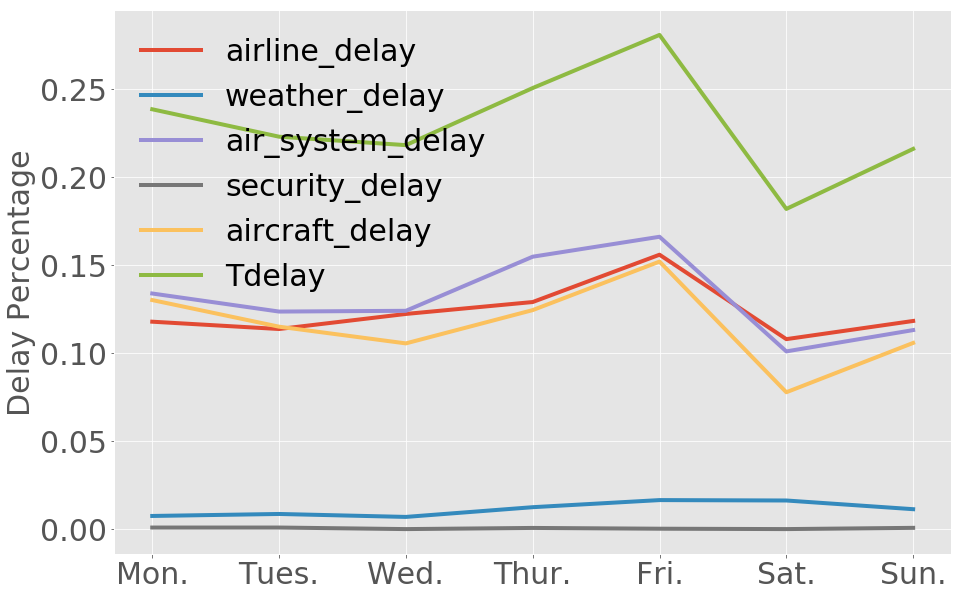

In [132]:
Freq_D=[]
for col in cols:
    Freq_D.append( f_traffic_delay[f_traffic_delay[col]>0].groupby('weekdayN')[col].count())
Freq_D = pd.concat(Freq_D, axis=1)
Freq_D
Freq_D['totalN'] = f_traffic_delay.groupby('weekdayN')['Tdelay'].count()
for col in cols:
       Freq_D[col] = Freq_D[col]/Freq_D['totalN'] 
del Freq_D['totalN']
Freq_D.fillna(0, inplace=True)
plt.figure( ); Freq_D.plot(figsize=(15,10), fontsize =30,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =30)# ratio
plt.xlabel('', fontsize=30)
plt.ylabel('Delay Percentage', fontsize=30)
plt.xticks(range(1,8), ['Mon.','Tues.','Wed.','Thur.','Fri.','Sat.','Sun.'])

In [60]:
f_traffic_delay['scheduled_departure'] = f_traffic_delay['scheduled_departure'].apply(str)
f_traffic_delay['scheduled_departure'] = f_traffic_delay['scheduled_departure'].apply(lambda x: x.zfill(4))
f_traffic_delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4                1556              0   
517               LGA  2017      1    4                1000              0   
655               JFK  2017      1   15                1710              0   
656               JFK  2017      1   22                1710              0   
657               JFK  2017      1   30                1710              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17                1525              0   
567646            EWR  2017     12   17                0959              0   
567651            EWR  2017     12   17                1055              0   
567653            EWR  2017     12   17                0945              0   
567657            EWR  2017     12   17                1400              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  
225        0.0 2017-01-04  Wednesday         3  
517        0.0 2017-01-04  Wednesday         3  
655        0.0 2017-01-15     Sunday         7  
656       30.0 2017-01-22     Sunday         7  
657        0.0 2017-01-30     Monday         1  
...        ...        ...        ...       ...  
567643     0.0 2017-12-17     Sunday         7  
567646     0.0 2017-12-17     Sunday         7  
567651     0.0 2017-12-17     Sunday         7  
567653     0.0 2017-12-17     Sunday         7  
567657     0.0 2017-12-17     Sunday         7  

[30457 rows x 14 columns]

In [61]:
f_traffic_delay['scheduled_departure'] = pd.to_datetime(f_traffic_delay['scheduled_departure'], format='%H%M')
f_traffic_delay['scheduled_departure'] = [time.time() for time in f_traffic_delay['scheduled_departure']]
f_traffic_delay

origin_airport  year  month  day scheduled_departure  airline_delay  \
225               LGA  2017      1    4            15:56:00              0   
517               LGA  2017      1    4            10:00:00              0   
655               JFK  2017      1   15            17:10:00              0   
656               JFK  2017      1   22            17:10:00              0   
657               JFK  2017      1   30            17:10:00              0   
...               ...   ...    ...  ...                 ...            ...   
567643            EWR  2017     12   17            15:25:00              0   
567646            EWR  2017     12   17            09:59:00              0   
567651            EWR  2017     12   17            10:55:00              0   
567653            EWR  2017     12   17            09:45:00              0   
567657            EWR  2017     12   17            14:00:00              0   

        weather_delay  air_system_delay  security_delay  aircraft_delay  \
225                 0                 0               0               0   
517                 0                 0               0               0   
655                 0                 0               0               0   
656                 0                 0               0               1   
657                 0                 0               0               0   
...               ...               ...             ...             ...   
567643              0                 0               0               0   
567646              0                 0               0               0   
567651              0                 0               0               0   
567653              0                 0               0               0   
567657              0                 0               0               0   

        Tdelay       date    weekday  weekdayN  
225        0.0 2017-01-04  Wednesday         3  
517        0.0 2017-01-04  Wednesday         3  
655        0.0 2017-01-15     Sunday         7  
656       30.0 2017-01-22     Sunday         7  
657        0.0 2017-01-30     Monday         1  
...        ...        ...        ...       ...  
567643     0.0 2017-12-17     Sunday         7  
567646     0.0 2017-12-17     Sunday         7  
567651     0.0 2017-12-17     Sunday         7  
567653     0.0 2017-12-17     Sunday         7  
567657     0.0 2017-12-17     Sunday         7  

[30457 rows x 14 columns]

In [62]:
f_traffic_delay['hour'] = f_traffic_delay['scheduled_departure'].apply(lambda x: x.hour)
f_traffic_delay.head()

origin_airport  year  month  day scheduled_departure  airline_delay  \
225            LGA  2017      1    4            15:56:00              0   
517            LGA  2017      1    4            10:00:00              0   
655            JFK  2017      1   15            17:10:00              0   
656            JFK  2017      1   22            17:10:00              0   
657            JFK  2017      1   30            17:10:00              0   

     weather_delay  air_system_delay  security_delay  aircraft_delay  Tdelay  \
225              0                 0               0               0     0.0   
517              0                 0               0               0     0.0   
655              0                 0               0               0     0.0   
656              0                 0               0               1    30.0   
657              0                 0               0               0     0.0   

          date    weekday  weekdayN  hour  
225 2017-01-04  Wednesday         3    15  
517 2017-01-04  Wednesday         3    10  
655 2017-01-15     Sunday         7    17  
656 2017-01-22     Sunday         7    17  
657 2017-01-30     Monday         1    17

Text(0, 0.5, 'Delay Percentage')

<Figure size 432x288 with 0 Axes>

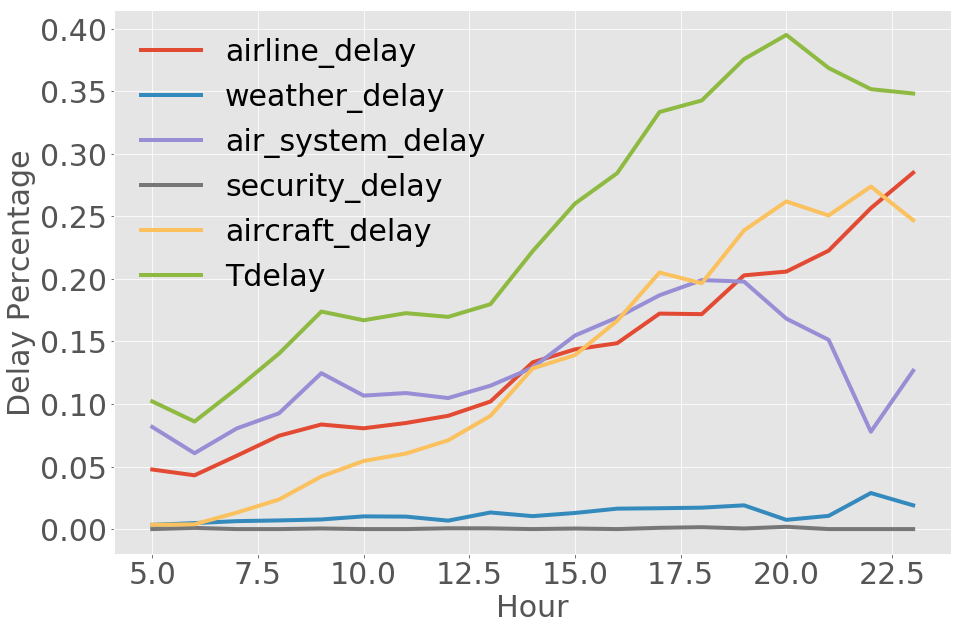

In [133]:
Freq_H=[]
for col in cols:
    Freq_H.append( f_traffic_delay[f_traffic_delay[col]>0].groupby('hour')[col].count())
Freq_H = pd.concat(Freq_H, axis=1)
Freq_H
Freq_H['totalN'] = f_traffic_delay.groupby('hour')['Tdelay'].count()
for col in cols:
       Freq_H[col] = Freq_H[col]/Freq_H['totalN'] 
del Freq_H['totalN']
Freq_H.fillna(0, inplace=True)
plt.figure( ); Freq_H.plot(figsize=(15,10), fontsize =30,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =30)# ratio
plt.xlabel('Hour', fontsize=30)
plt.ylabel('Delay Percentage', fontsize=30)

晚上为啥那么多delay

In [63]:
f_traffic_delay['season'] = f_traffic_delay['month'].apply(lambda x: (x%12 + 3)//3 )
f_traffic_delay.head()

origin_airport  year  month  day scheduled_departure  airline_delay  \
225            LGA  2017      1    4            15:56:00              0   
517            LGA  2017      1    4            10:00:00              0   
655            JFK  2017      1   15            17:10:00              0   
656            JFK  2017      1   22            17:10:00              0   
657            JFK  2017      1   30            17:10:00              0   

     weather_delay  air_system_delay  security_delay  aircraft_delay  Tdelay  \
225              0                 0               0               0     0.0   
517              0                 0               0               0     0.0   
655              0                 0               0               0     0.0   
656              0                 0               0               1    30.0   
657              0                 0               0               0     0.0   

          date    weekday  weekdayN  hour  season  
225 2017-01-04  Wednesday         3    15       1  
517 2017-01-04  Wednesday         3    10       1  
655 2017-01-15     Sunday         7    17       1  
656 2017-01-22     Sunday         7    17       1  
657 2017-01-30     Monday         1    17       1

([<matplotlib.axis.XTick at 0x2651dc50>,
 <a list of 4 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

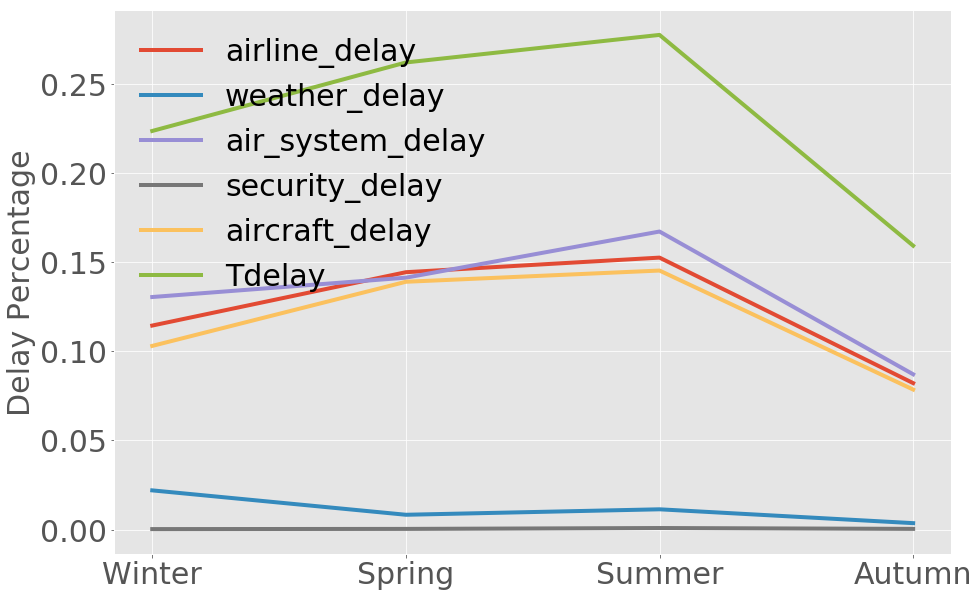

In [135]:
#[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
Freq_S=[]
for col in cols:
    Freq_S.append( f_traffic_delay[f_traffic_delay[col]>0].groupby('season')[col].count())
Freq_S = pd.concat(Freq_S, axis=1)
Freq_S
Freq_S['totalN'] = f_traffic_delay.groupby('season')['Tdelay'].count()
for col in cols:
       Freq_S[col] = Freq_S[col]/Freq_S['totalN'] 
del Freq_S['totalN']

plt.figure( ); Freq_S.plot(figsize=(15,10), fontsize =30,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =30)# ratio
plt.xlabel('', fontsize=30)
plt.ylabel('Delay Percentage', fontsize=30)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])

autumn is the best

# The average time if delayed

([<matplotlib.axis.XTick at 0x264fa240>,
 <a list of 4 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

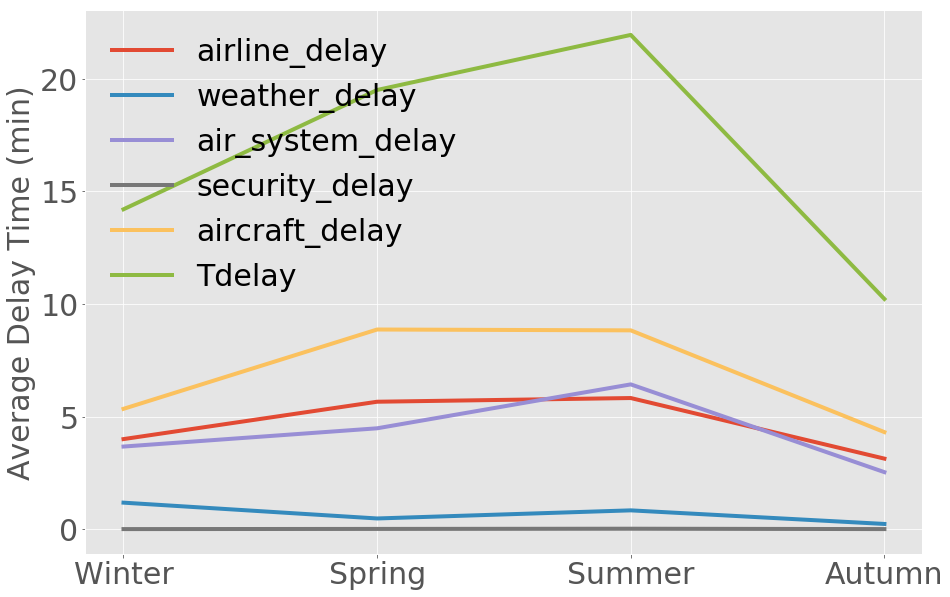

In [136]:
#[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1] 
Av_S = f_traffic_delay.groupby('season')[cols].mean()
 
plt.figure( ); Av_S.plot(figsize=(15,10), fontsize =30,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =30)# ratio
plt.xlabel('', fontsize=30)
plt.ylabel('Average Delay Time (min)', fontsize=30)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])

Text(0, 0.5, 'Average Delay Time (min)')

<Figure size 432x288 with 0 Axes>

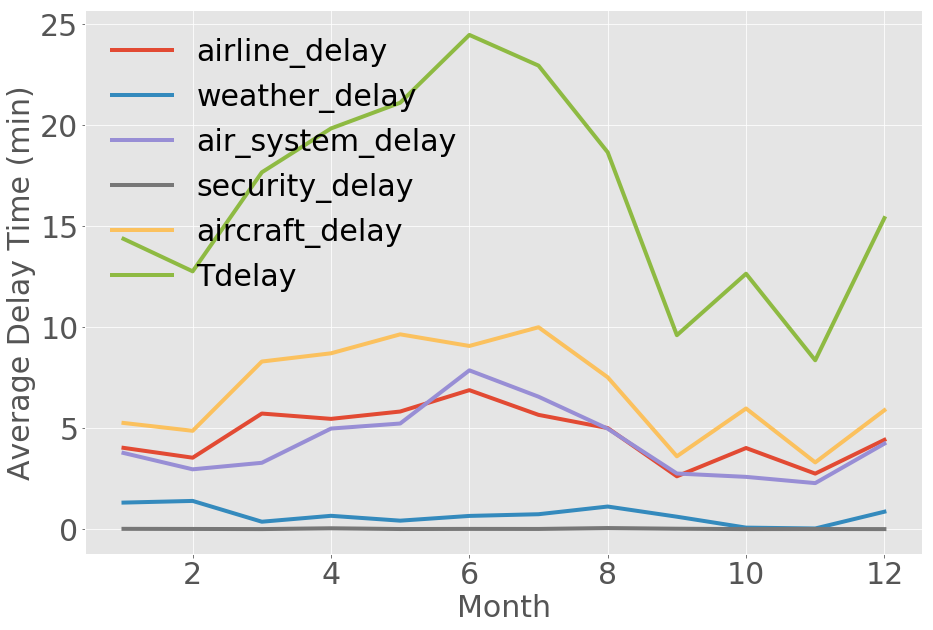

In [139]:
 
Av_M = f_traffic_delay.groupby('month')[cols].mean()
 
plt.figure( ); Av_M.plot(figsize=(15,10), fontsize =30,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =30)# ratio
plt.xlabel('Month', fontsize=30)
plt.ylabel('Average Delay Time (min)', fontsize=30)
 

([<matplotlib.axis.XTick at 0x24ccecc0>,
 <a list of 7 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

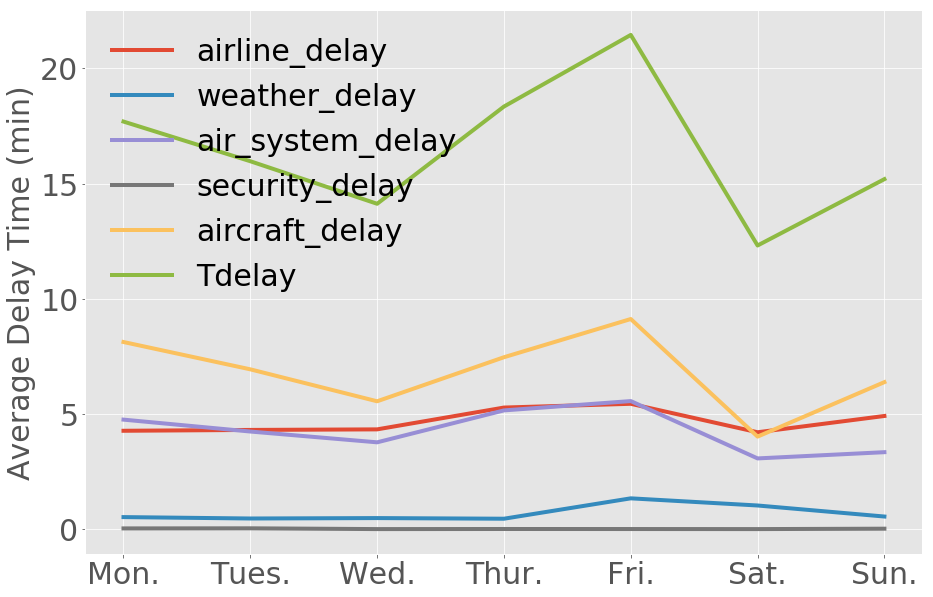

In [141]:
Av_D = f_traffic_delay.groupby('weekdayN')[cols].mean()
 
plt.figure( ); Av_D.plot(figsize=(15,10), fontsize =30,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =30)# ratio
plt.xlabel('', fontsize=30)
plt.ylabel('Average Delay Time (min)', fontsize=30)
plt.xticks(range(1,8), ['Mon.','Tues.','Wed.','Thur.','Fri.','Sat.','Sun.'])

Text(0, 0.5, 'Average Delay Time (min)')

<Figure size 432x288 with 0 Axes>

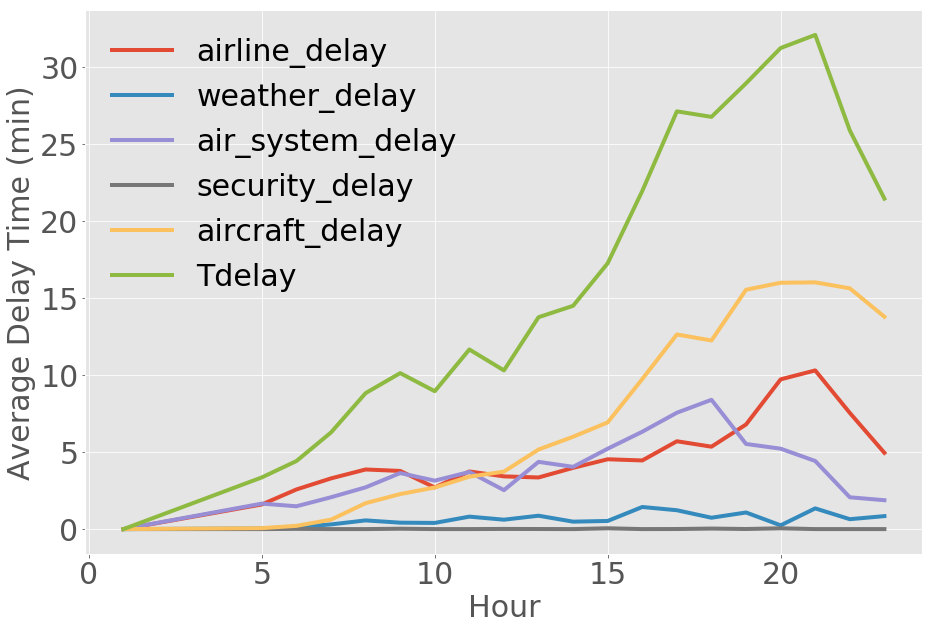

In [140]:
Av_H = f_traffic_delay.groupby('hour')[cols].mean()
 
plt.figure( ); Av_H.plot(figsize=(15,10), fontsize =30,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =30)# ratio
plt.xlabel('Hour', fontsize=30)
plt.ylabel('Average Delay Time (min)', fontsize=30)
 

# Same thing but for different airports

In [62]:
delay_JFK = f_traffic_delay[f_traffic_delay['origin_airport']== 'JFK']
delay_JFK.head()

origin_airport  year  month  day scheduled_departure  airline_delay  \
655             JFK  2017      1   15            17:10:00            0.0   
656             JFK  2017      1   22            17:10:00            0.0   
657             JFK  2017      1   30            17:10:00            0.0   
1362            JFK  2017      1   10            17:10:00            0.0   
1363            JFK  2017      1   11            17:10:00            0.0   

      weather_delay  air_system_delay  security_delay  aircraft_delay  Tdelay  \
655             0.0               0.0             0.0             0.0     0.0   
656             0.0               0.0             0.0            30.0    30.0   
657             0.0               0.0             0.0             0.0     0.0   
1362            0.0              51.0             0.0             0.0    51.0   
1363            0.0               0.0             0.0             0.0     0.0   

           date    weekday  weekdayN  hour  season  
655  2017-01-15     Sunday         7    17       1  
656  2017-01-22     Sunday         7    17       1  
657  2017-01-30     Monday         1    17       1  
1362 2017-01-10    Tuesday         2    17       1  
1363 2017-01-11  Wednesday         3    17       1

In [63]:
delay_EWR = f_traffic_delay[f_traffic_delay['origin_airport']== 'EWR']
delay_EWR.head()

origin_airport  year  month  day scheduled_departure  airline_delay  \
707            EWR  2017      1    3            08:15:00            0.0   
721            EWR  2017      1    3            13:05:00            0.0   
722            EWR  2017      1    8            13:05:00           15.0   
853            EWR  2017      1    3            17:20:00            0.0   
893            EWR  2017      1    1            11:00:00            0.0   

     weather_delay  air_system_delay  security_delay  aircraft_delay  Tdelay  \
707            0.0               0.0             0.0             0.0     0.0   
721            0.0               0.0             0.0             0.0     0.0   
722            0.0               0.0             0.0             0.0    15.0   
853            0.0               0.0             0.0             0.0     0.0   
893            0.0               0.0             0.0             0.0     0.0   

          date  weekday  weekdayN  hour  season  
707 2017-01-03  Tuesday         2     8       1  
721 2017-01-03  Tuesday         2    13       1  
722 2017-01-08   Sunday         7    13       1  
853 2017-01-03  Tuesday         2    17       1  
893 2017-01-01   Sunday         7    11       1

In [64]:
delay_LGA = f_traffic_delay[f_traffic_delay['origin_airport']== 'LGA']
delay_LGA.head()

origin_airport  year  month  day scheduled_departure  airline_delay  \
225             LGA  2017      1    4            15:56:00            0.0   
517             LGA  2017      1    4            10:00:00            0.0   
911             LGA  2017      1    2            15:29:00            0.0   
1011            LGA  2017      1    3            09:00:00            0.0   
1012            LGA  2017      1    5            09:00:00            0.0   

      weather_delay  air_system_delay  security_delay  aircraft_delay  Tdelay  \
225             0.0               0.0             0.0             0.0     0.0   
517             0.0               0.0             0.0             0.0     0.0   
911             0.0               0.0             0.0             0.0     0.0   
1011            0.0               0.0             0.0             0.0     0.0   
1012            0.0               0.0             0.0             0.0     0.0   

           date    weekday  weekdayN  hour  season  
225  2017-01-04  Wednesday         3    15       1  
517  2017-01-04  Wednesday         3    10       1  
911  2017-01-02     Monday         1    15       1  
1011 2017-01-03    Tuesday         2     9       1  
1012 2017-01-05   Thursday         4     9       1

Text(0, 0.5, 'Delay Percentage')

<Figure size 432x288 with 0 Axes>

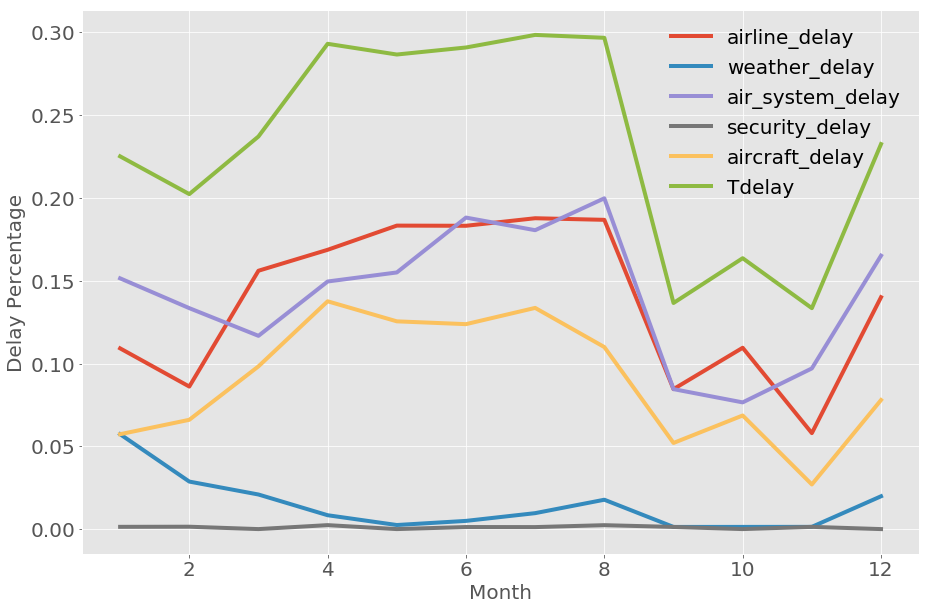

In [91]:
Freq_M_JFK = delay_JFK.groupby('month')[cols].agg({ lambda ts: (ts > 0).sum()})
Freq_M_JFK['totalN'] = delay_JFK.groupby('month')['Tdelay'].count()
Freq_Mon_JFK=[]
for col in cols:
    Freq_Mon_JFK.append( delay_JFK[delay_JFK[col]>0].groupby('month')[col].count())
Freq_M_JFK = pd.concat(Freq_Mon_JFK, axis=1)
Freq_M_JFK['totalN'] = delay_JFK.groupby('month')['Tdelay'].count()
for col in cols:
       Freq_M_JFK[col] = Freq_M_JFK[col]/Freq_M_JFK['totalN'] 
del Freq_M_JFK['totalN']
Freq_M_JFK.fillna(0, inplace=True)
plt.figure(  ); Freq_M_JFK.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Month', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)

([<matplotlib.axis.XTick at 0x22a48978>,
 <a list of 4 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

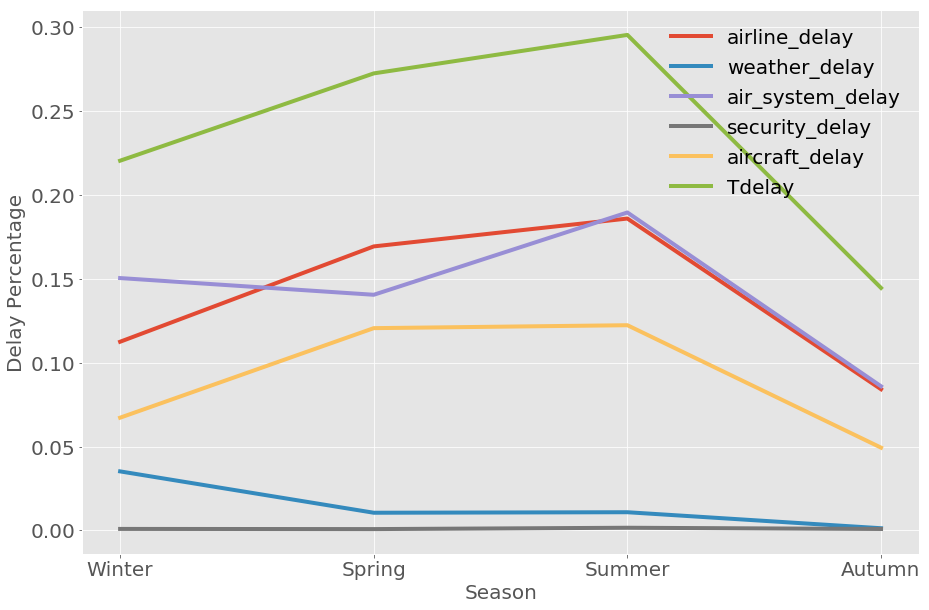

In [92]:
#[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
Freq_S_JFK=[]
for col in cols:
    Freq_S_JFK.append(delay_JFK[delay_JFK[col]>0].groupby('season')[col].count())
Freq_S_JFK = pd.concat(Freq_S_JFK, axis=1)
 
Freq_S_JFK['totalN'] =  delay_JFK.groupby('season')['Tdelay'].count()
for col in cols:
       Freq_S_JFK[col] = Freq_S_JFK[col]/Freq_S_JFK['totalN'] 
del Freq_S_JFK['totalN']

plt.figure( ); Freq_S_JFK.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Season', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])

([<matplotlib.axis.XTick at 0x23ad99b0>,
 <a list of 7 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

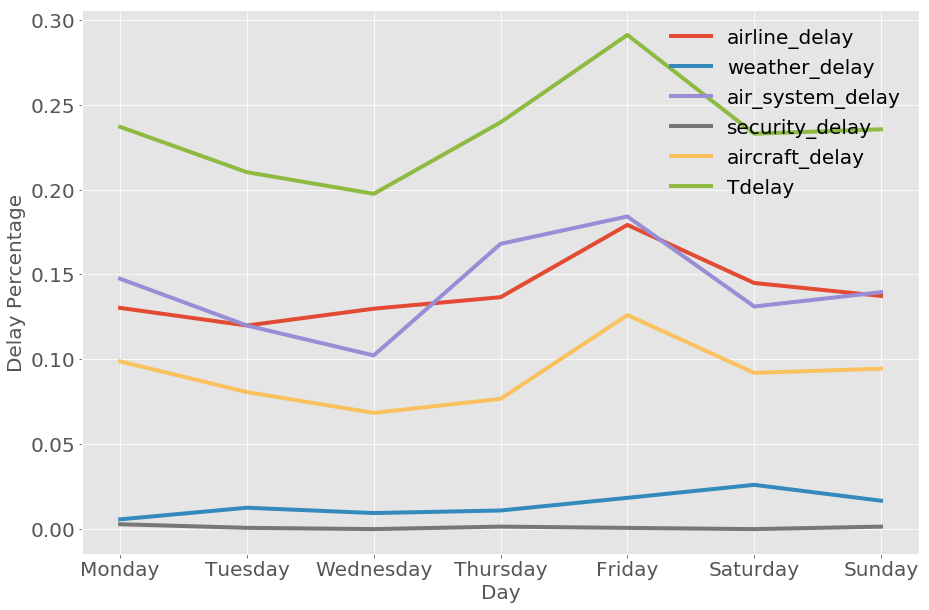

In [98]:
Freq_D_JFK=[]
for col in cols:
    Freq_D_JFK.append(  delay_JFK[ delay_JFK[col]>0].groupby('weekdayN')[col].count())
Freq_D_JFK = pd.concat(Freq_D_JFK, axis=1)
 
Freq_D_JFK['totalN'] =  delay_JFK.groupby('weekdayN')['Tdelay'].count()
for col in cols:
       Freq_D_JFK[col] = Freq_D_JFK[col]/Freq_D_JFK['totalN'] 
del Freq_D_JFK['totalN']
Freq_D_JFK.fillna(0, inplace=True)
plt.figure( ); Freq_D_JFK.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Day', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)
plt.xticks(range(1,8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Text(0, 0.5, 'Delay Percentage')

<Figure size 432x288 with 0 Axes>

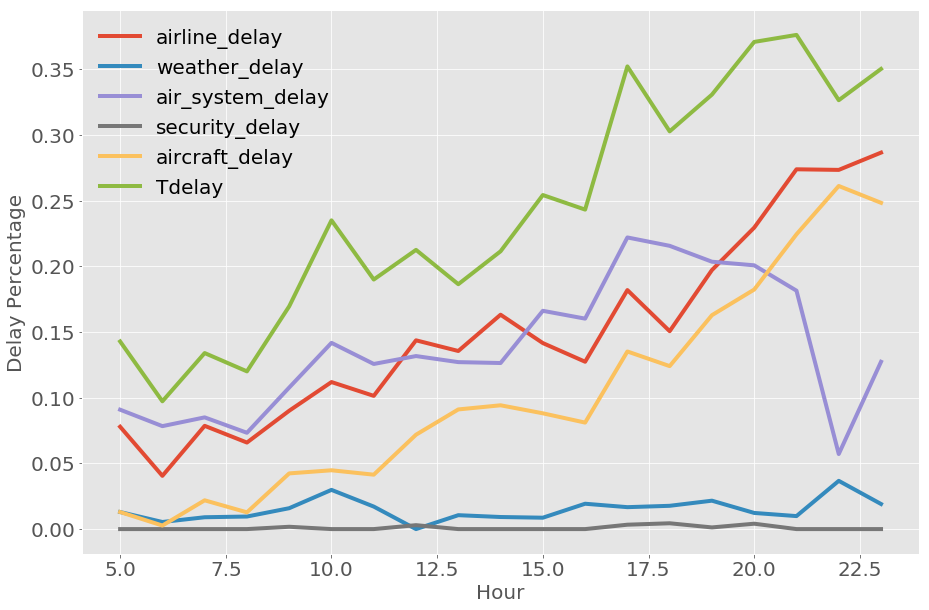

In [99]:
Freq_H_JFK=[]
for col in cols:
    Freq_H_JFK.append( delay_JFK[ delay_JFK[col]>0].groupby('hour')[col].count())
Freq_H_JFK = pd.concat(Freq_H_JFK, axis=1)
Freq_H_JFK
Freq_H_JFK['totalN'] =  delay_JFK.groupby('hour')['Tdelay'].count()
for col in cols:
       Freq_H_JFK[col] = Freq_H_JFK[col]/Freq_H_JFK['totalN'] 
del Freq_H_JFK['totalN']
Freq_H_JFK.fillna(0, inplace=True)
plt.figure( ); Freq_H_JFK.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =20)# ratio
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)

Text(0, 0.5, 'Delay Percentage')

<Figure size 432x288 with 0 Axes>

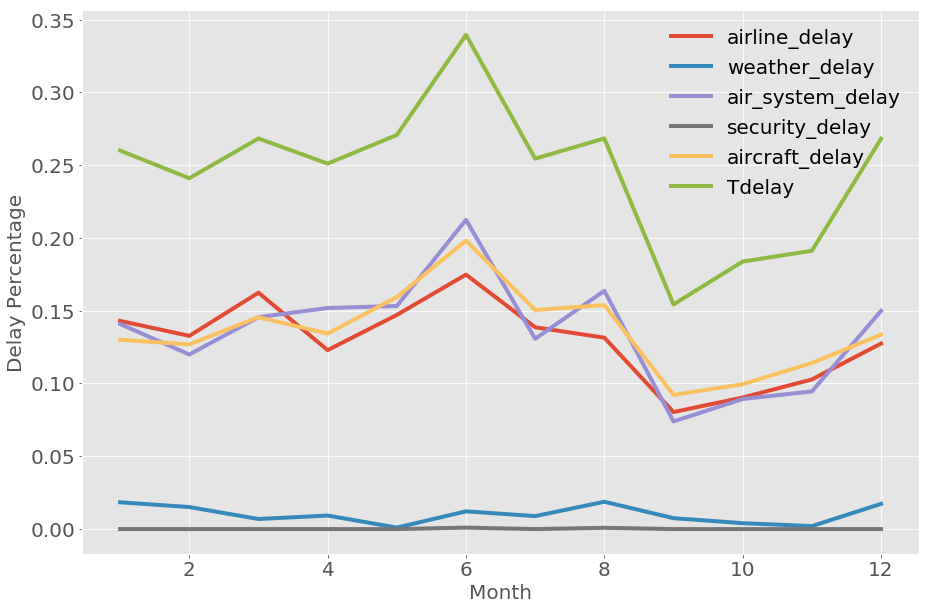

<Figure size 432x288 with 0 Axes>

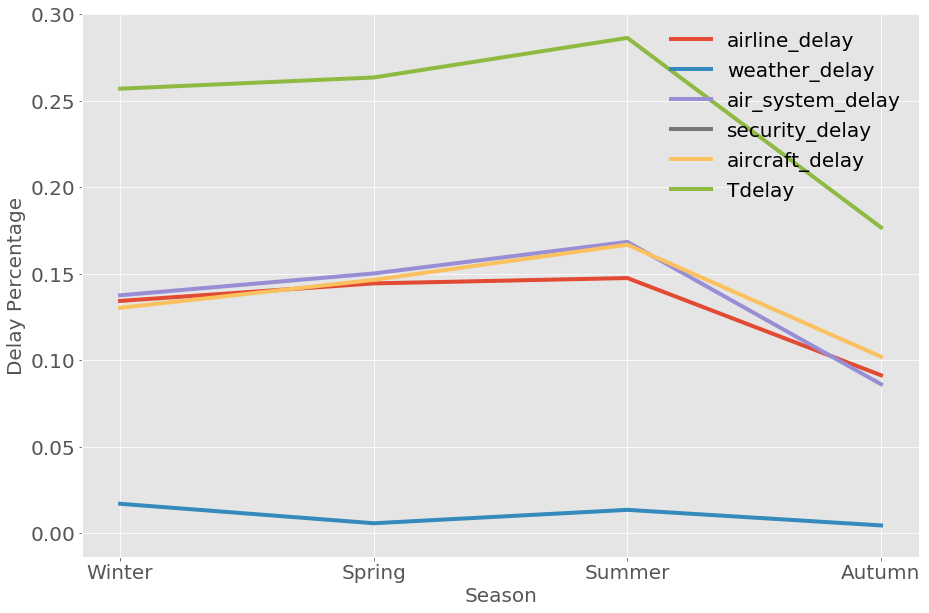

<Figure size 432x288 with 0 Axes>

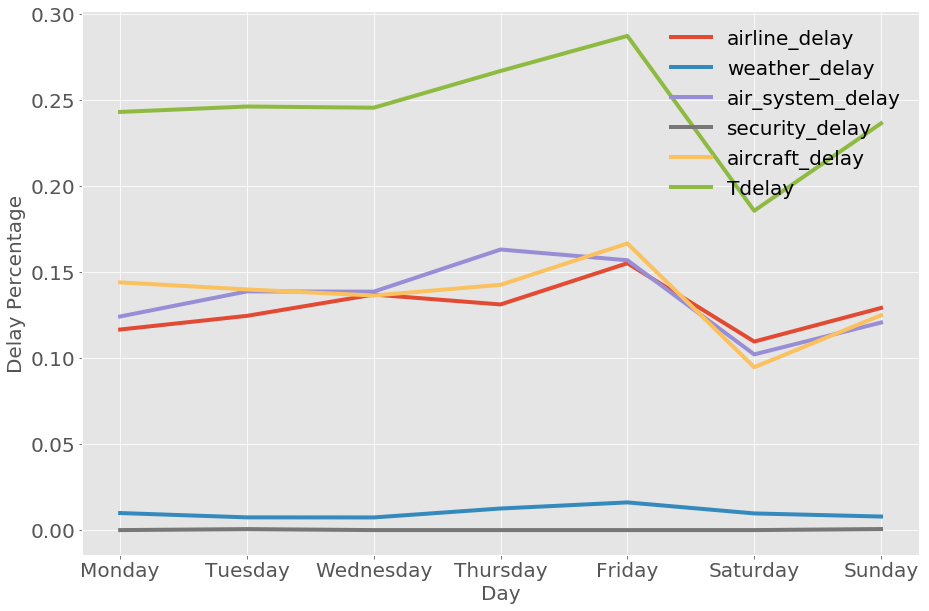

<Figure size 432x288 with 0 Axes>

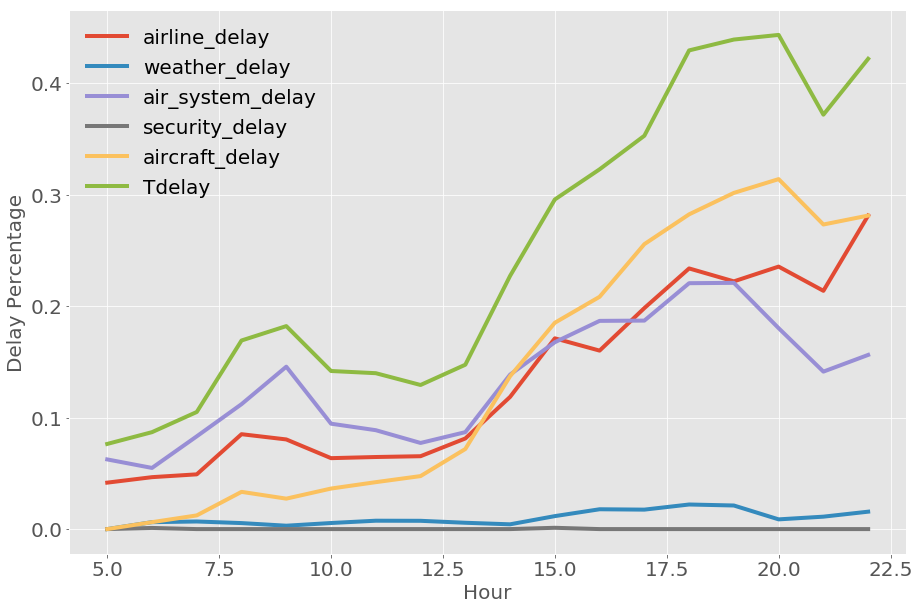

In [104]:
Freq_M_EWR = delay_EWR.groupby('month')[cols].agg({ lambda ts: (ts > 0).sum()})
Freq_M_EWR['totalN'] = delay_EWR.groupby('month')['Tdelay'].count()
Freq_Mon_EWR=[]
for col in cols:
    Freq_Mon_EWR.append( delay_EWR[delay_EWR[col]>0].groupby('month')[col].count())
Freq_M_EWR = pd.concat(Freq_Mon_EWR, axis=1)
Freq_M_EWR['totalN'] = delay_EWR.groupby('month')['Tdelay'].count()
for col in cols:
       Freq_M_EWR[col] = Freq_M_EWR[col]/Freq_M_EWR['totalN'] 
del Freq_M_EWR['totalN']
Freq_M_EWR.fillna(0, inplace=True)
plt.figure(  ); Freq_M_EWR.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Month', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)


#[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
Freq_S_EWR=[]
for col in cols:
    Freq_S_EWR.append(delay_EWR[delay_EWR[col]>0].groupby('season')[col].count())
Freq_S_EWR = pd.concat(Freq_S_EWR, axis=1)
Freq_S_EWR['totalN'] =  delay_EWR.groupby('season')['Tdelay'].count()
for col in cols:
       Freq_S_EWR[col] = Freq_S_EWR[col]/Freq_S_EWR['totalN'] 
del Freq_S_EWR['totalN']
plt.figure( ); Freq_S_EWR.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Season', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])


Freq_D_EWR=[]
for col in cols:
    Freq_D_EWR.append(  delay_EWR[ delay_EWR[col]>0].groupby('weekdayN')[col].count())
Freq_D_EWR = pd.concat(Freq_D_EWR, axis=1)
 
Freq_D_EWR['totalN'] =  delay_EWR.groupby('weekdayN')['Tdelay'].count()
for col in cols:
       Freq_D_EWR[col] = Freq_D_EWR[col]/Freq_D_EWR['totalN'] 
del Freq_D_EWR['totalN']
Freq_D_EWR.fillna(0, inplace=True)
plt.figure( ); Freq_D_EWR.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Day', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)
plt.xticks(range(1,8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])



Freq_H_EWR=[]
for col in cols:
    Freq_H_EWR.append( delay_EWR[ delay_EWR[col]>0].groupby('hour')[col].count())
Freq_H_EWR = pd.concat(Freq_H_EWR, axis=1)
Freq_H_EWR['totalN'] =  delay_EWR.groupby('hour')['Tdelay'].count()
for col in cols:
       Freq_H_EWR[col] = Freq_H_EWR[col]/Freq_H_EWR['totalN'] 
del Freq_H_EWR['totalN']
Freq_H_EWR.fillna(0, inplace=True)
plt.figure( ); Freq_H_EWR.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =20)# ratio
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)


Text(0, 0.5, 'Delay Percentage')

<Figure size 432x288 with 0 Axes>

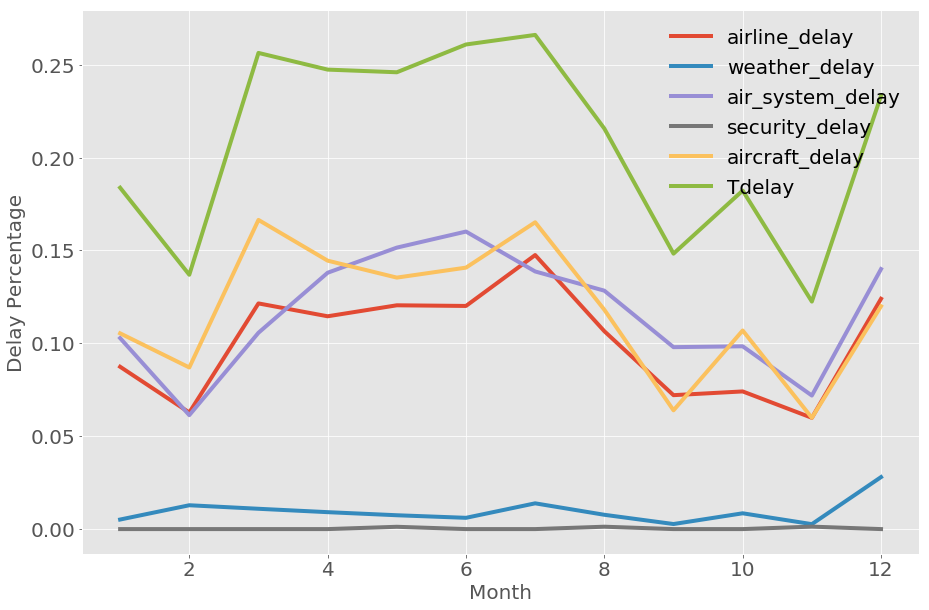

<Figure size 432x288 with 0 Axes>

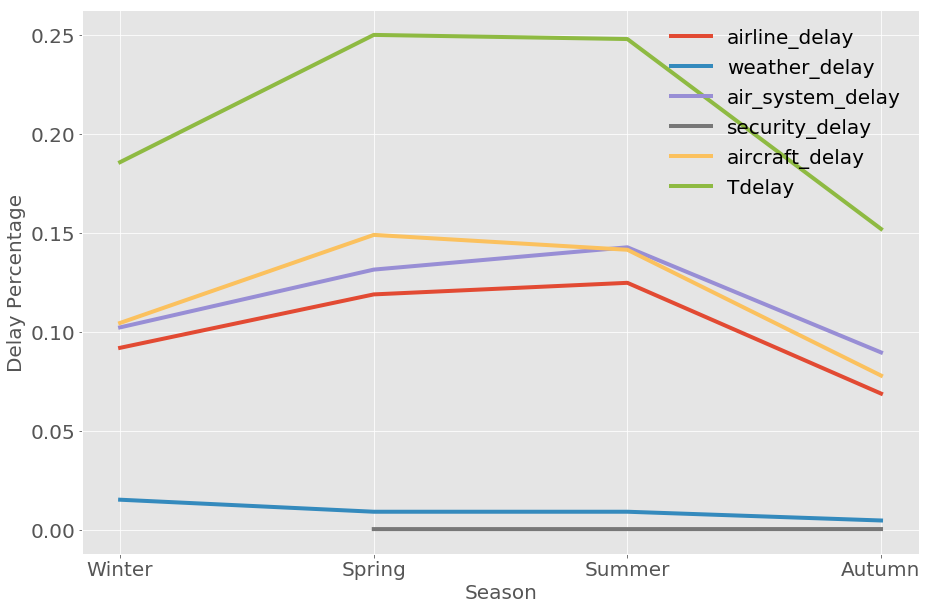

<Figure size 432x288 with 0 Axes>

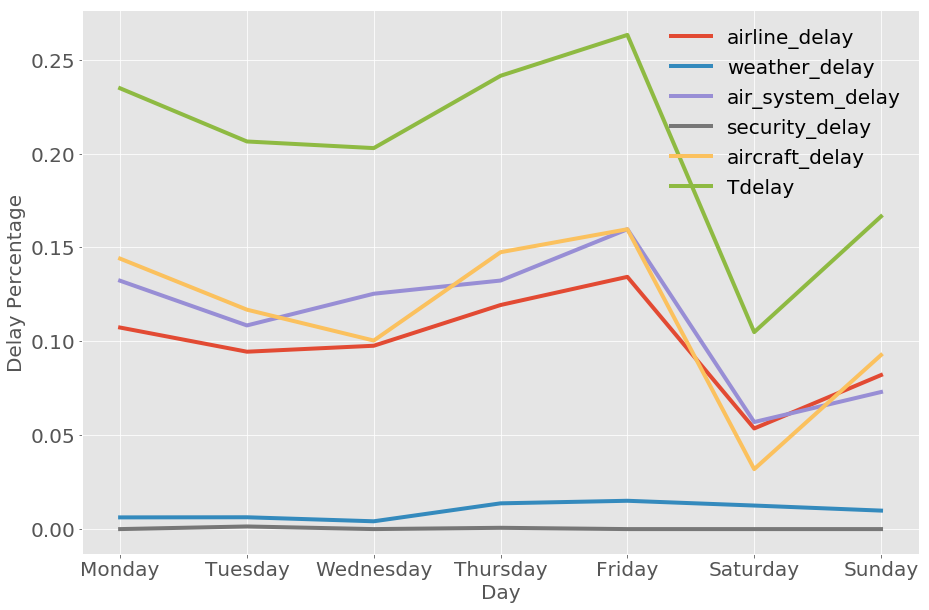

<Figure size 432x288 with 0 Axes>

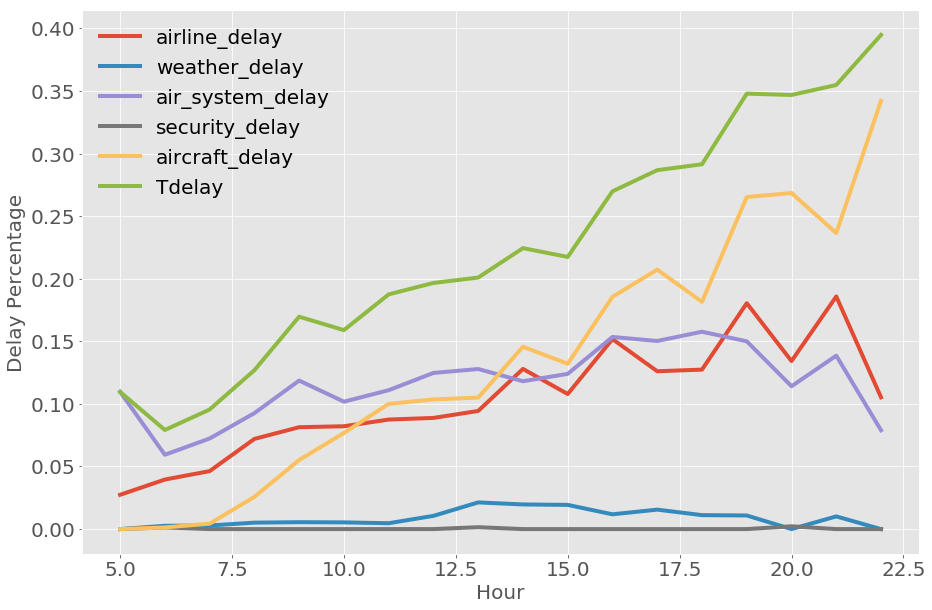

In [105]:
Freq_M_LGA = delay_LGA.groupby('month')[cols].agg({ lambda ts: (ts > 0).sum()})
Freq_M_LGA['totalN'] = delay_LGA.groupby('month')['Tdelay'].count()
Freq_Mon_LGA=[]
for col in cols:
    Freq_Mon_LGA.append( delay_LGA[delay_LGA[col]>0].groupby('month')[col].count())
Freq_M_LGA = pd.concat(Freq_Mon_LGA, axis=1)
Freq_M_LGA['totalN'] = delay_LGA.groupby('month')['Tdelay'].count()
for col in cols:
       Freq_M_LGA[col] = Freq_M_LGA[col]/Freq_M_LGA['totalN'] 
del Freq_M_LGA['totalN']
Freq_M_LGA.fillna(0, inplace=True)
plt.figure(  ); Freq_M_LGA.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Month', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)


#[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
Freq_S_LGA=[]
for col in cols:
    Freq_S_LGA.append(delay_LGA[delay_LGA[col]>0].groupby('season')[col].count())
Freq_S_LGA = pd.concat(Freq_S_LGA, axis=1)
Freq_S_LGA['totalN'] =  delay_LGA.groupby('season')['Tdelay'].count()
for col in cols:
       Freq_S_LGA[col] = Freq_S_LGA[col]/Freq_S_LGA['totalN'] 
del Freq_S_LGA['totalN']
plt.figure( ); Freq_S_LGA.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Season', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])


Freq_D_LGA=[]
for col in cols:
    Freq_D_LGA.append(  delay_LGA[ delay_LGA[col]>0].groupby('weekdayN')[col].count())
Freq_D_LGA = pd.concat(Freq_D_LGA, axis=1)
 
Freq_D_LGA['totalN'] =  delay_LGA.groupby('weekdayN')['Tdelay'].count()
for col in cols:
       Freq_D_LGA[col] = Freq_D_LGA[col]/Freq_D_LGA['totalN'] 
del Freq_D_LGA['totalN']
Freq_D_LGA.fillna(0, inplace=True)
plt.figure( ); Freq_D_LGA.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Day', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)
plt.xticks(range(1,8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])



Freq_H_LGA=[]
for col in cols:
    Freq_H_LGA.append( delay_LGA[ delay_LGA[col]>0].groupby('hour')[col].count())
Freq_H_LGA = pd.concat(Freq_H_LGA, axis=1)
Freq_H_LGA['totalN'] =  delay_LGA.groupby('hour')['Tdelay'].count()
for col in cols:
       Freq_H_LGA[col] = Freq_H_LGA[col]/Freq_H_LGA['totalN'] 
del Freq_H_LGA['totalN']
Freq_H_LGA.fillna(0, inplace=True)
plt.figure( ); Freq_H_LGA.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =20)# ratio
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)


All the airports have the same trends for delay percentage.

Text(0, 0.5, 'Average Delay Time (min)')

<Figure size 432x288 with 0 Axes>

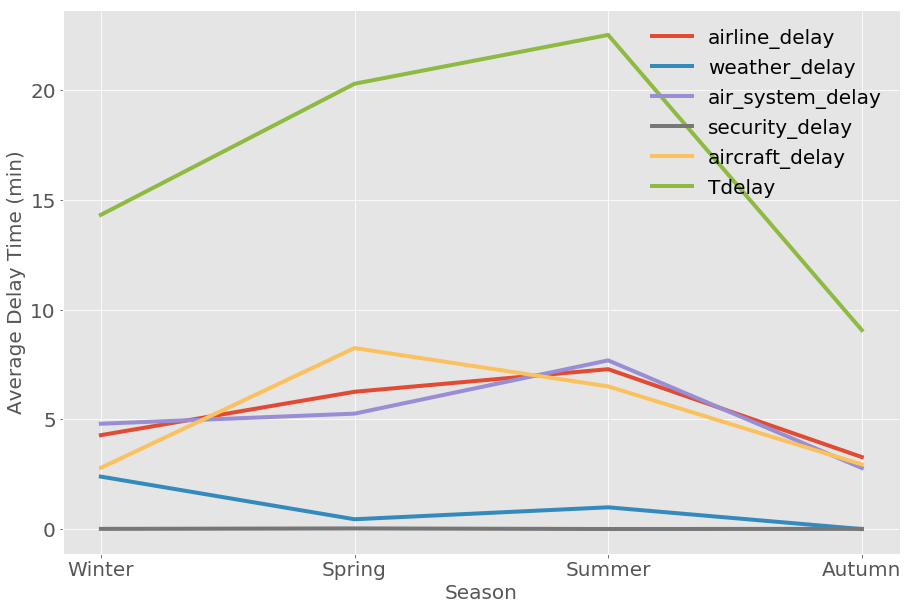

<Figure size 432x288 with 0 Axes>

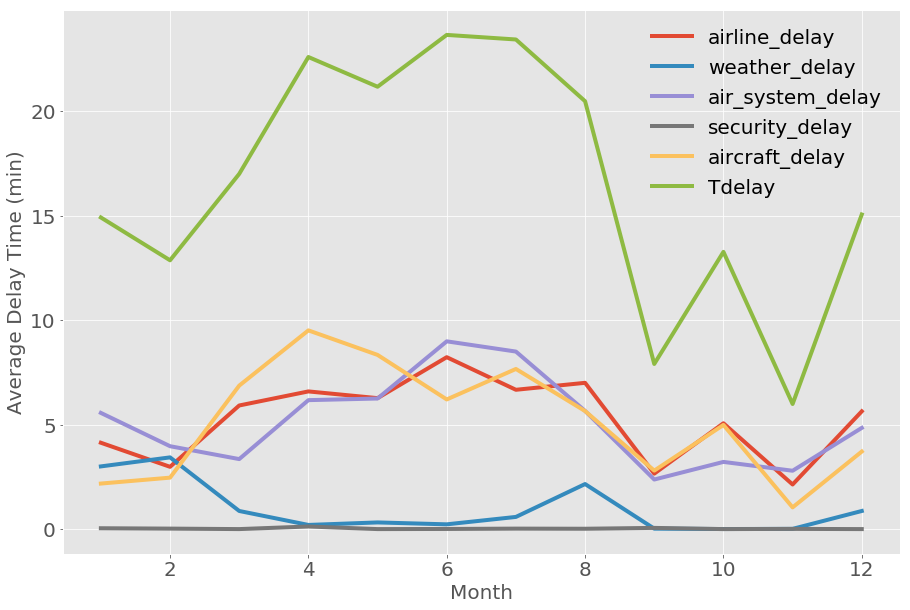

<Figure size 432x288 with 0 Axes>

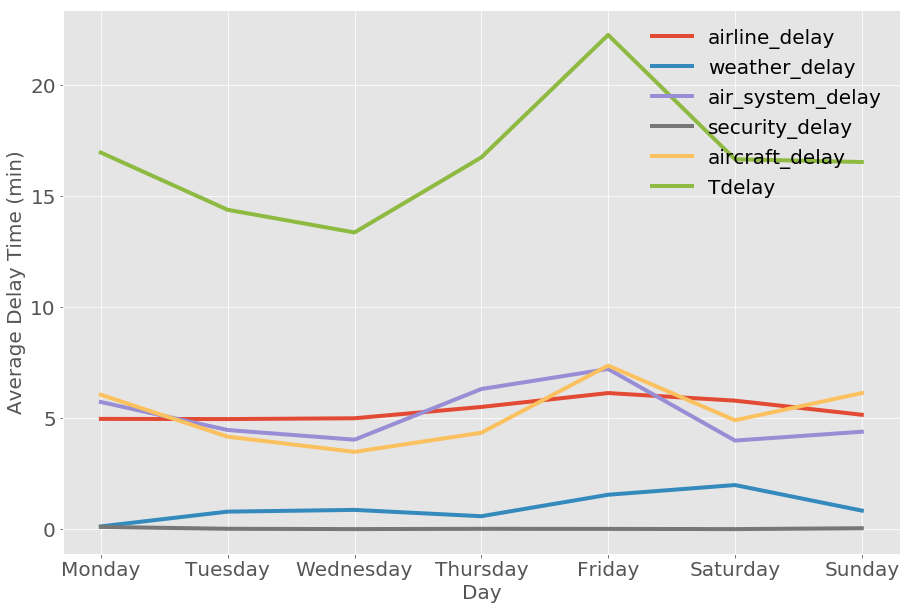

<Figure size 432x288 with 0 Axes>

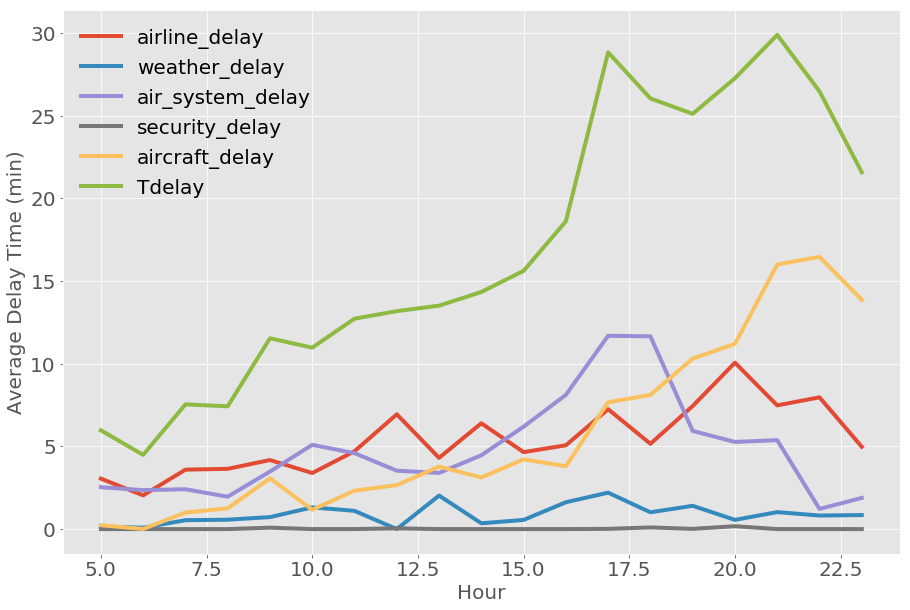

In [106]:
#[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1] 
Av_S_JFK =  delay_JFK.groupby('season')[cols].mean()
 
plt.figure( ); Av_S_JFK.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Season', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])



Av_M_JFK =  delay_JFK.groupby('month')[cols].mean()
 
plt.figure( ); Av_M_JFK.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Month', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
 
    
Av_D_JFK =  delay_JFK.groupby('weekdayN')[cols].mean()
 
plt.figure( ); Av_D_JFK.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Day', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
plt.xticks(range(1,8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])    
    
    

Av_H_JFK =  delay_JFK.groupby('hour')[cols].mean()
 
plt.figure( ); Av_H_JFK.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =20)# ratio
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
 

Text(0, 0.5, 'Average Delay Time (min)')

<Figure size 432x288 with 0 Axes>

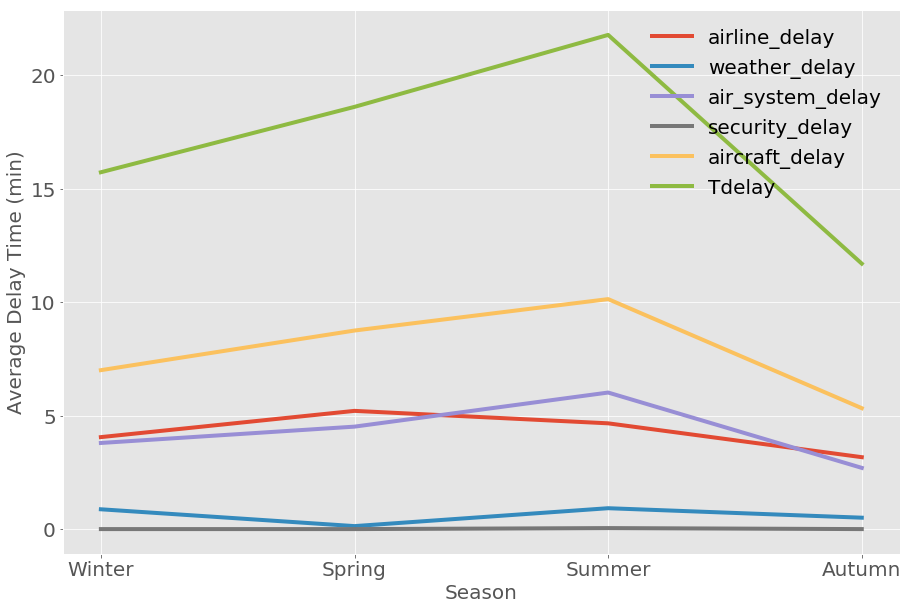

<Figure size 432x288 with 0 Axes>

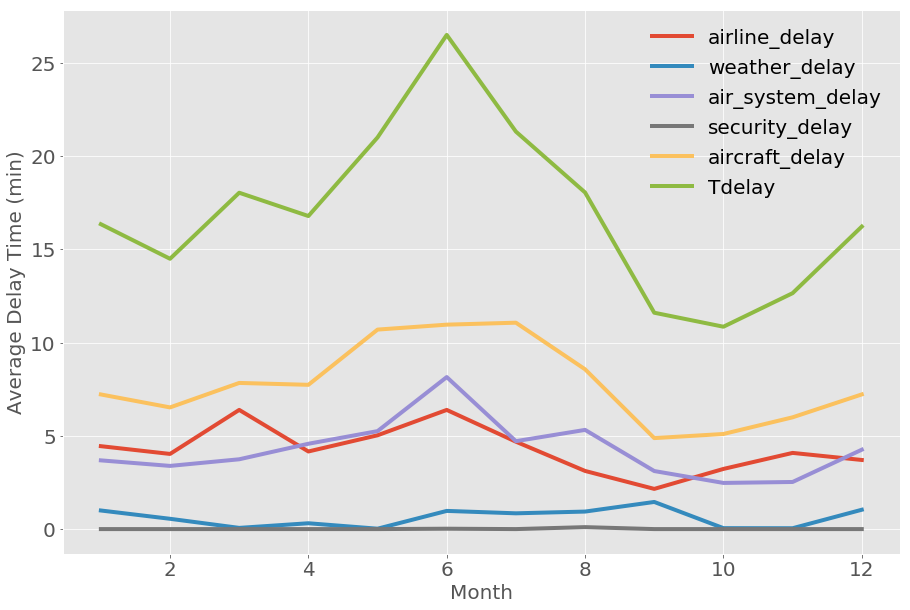

<Figure size 432x288 with 0 Axes>

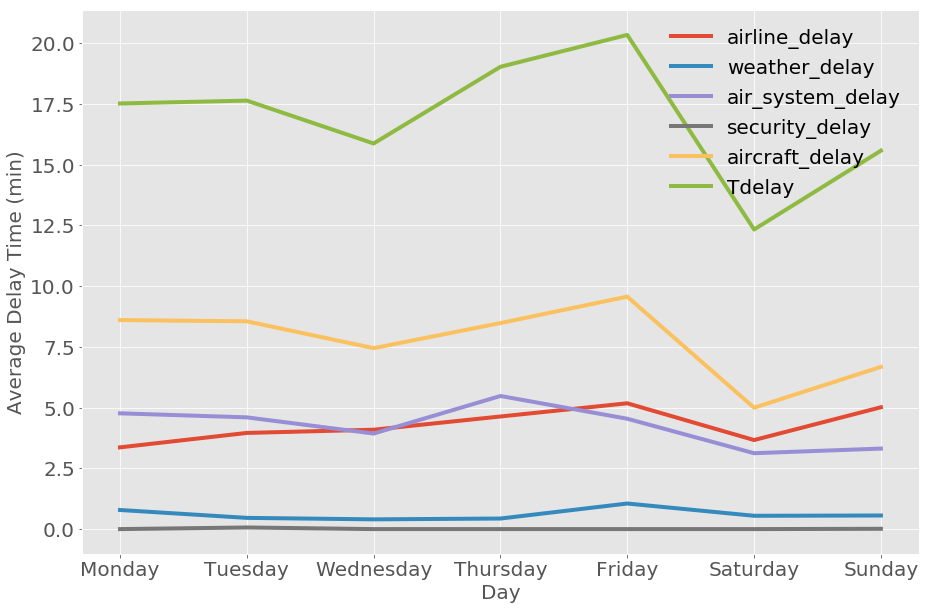

<Figure size 432x288 with 0 Axes>

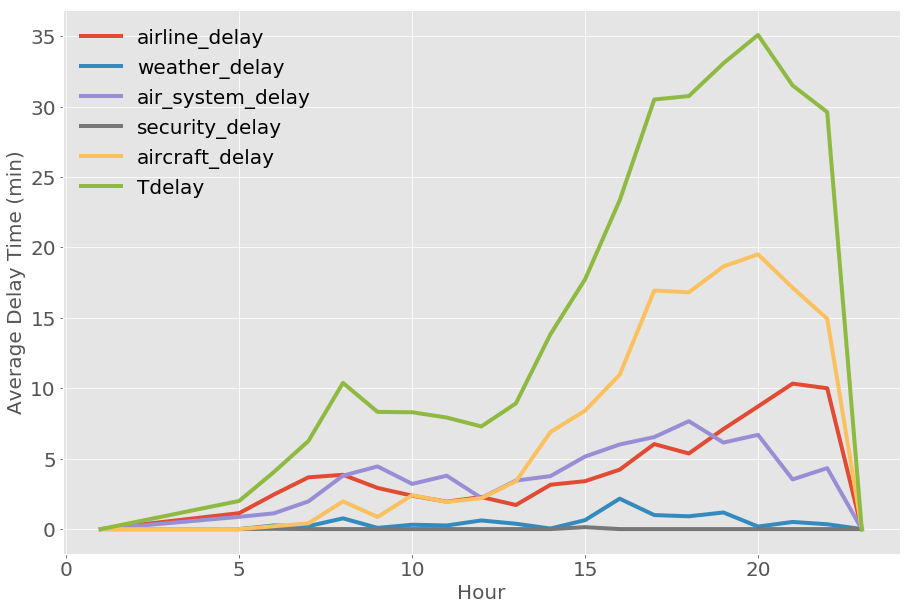

In [107]:
#[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1] 
Av_S_EWR =  delay_EWR.groupby('season')[cols].mean()
 
plt.figure( ); Av_S_EWR.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Season', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])



Av_M_EWR =  delay_EWR.groupby('month')[cols].mean()
 
plt.figure( ); Av_M_EWR.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Month', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
 
    
Av_D_EWR =  delay_EWR.groupby('weekdayN')[cols].mean()
 
plt.figure( ); Av_D_EWR.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Day', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
plt.xticks(range(1,8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])    
    
    

Av_H_EWR =  delay_EWR.groupby('hour')[cols].mean()
 
plt.figure( ); Av_H_EWR.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =20)# ratio
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
 

Text(0, 0.5, 'Average Delay Time (min)')

<Figure size 432x288 with 0 Axes>

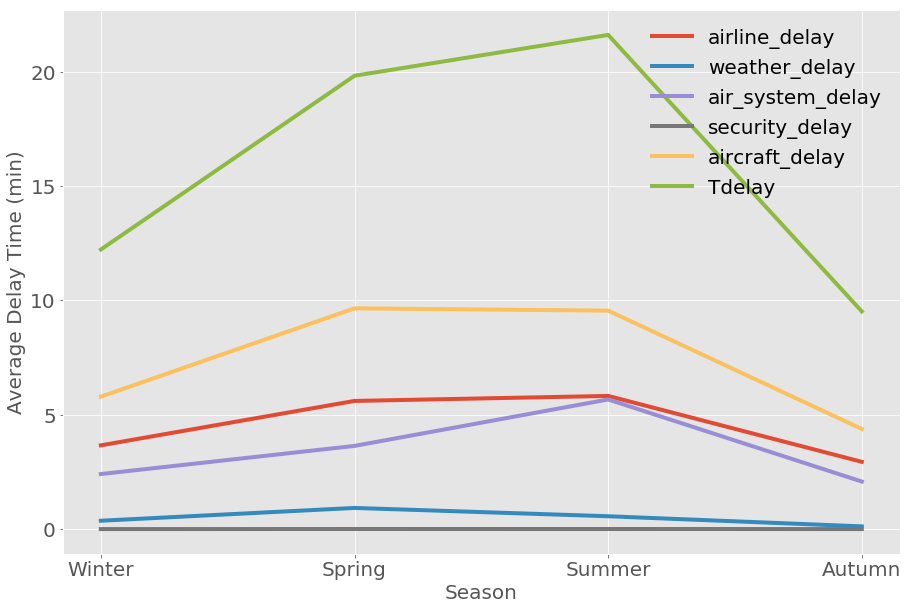

<Figure size 432x288 with 0 Axes>

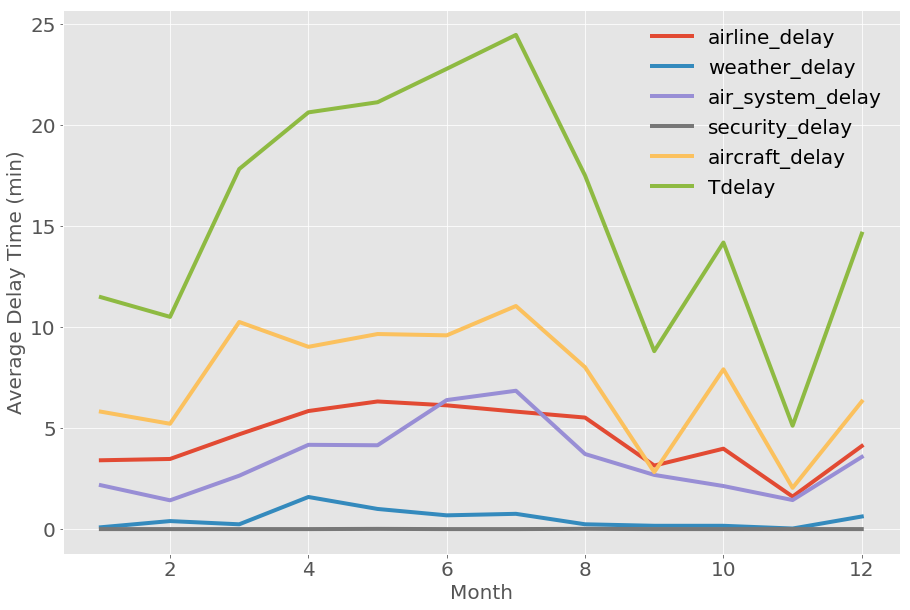

<Figure size 432x288 with 0 Axes>

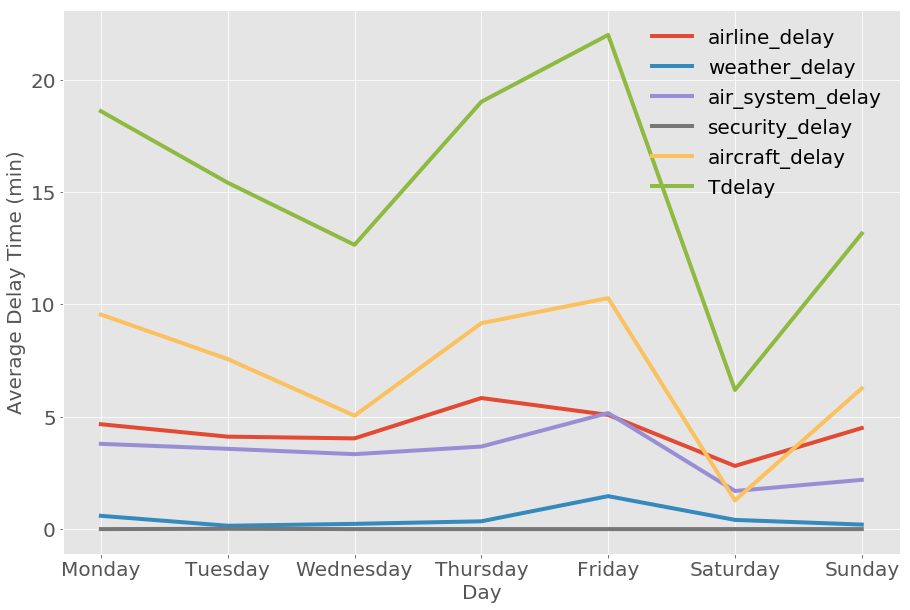

<Figure size 432x288 with 0 Axes>

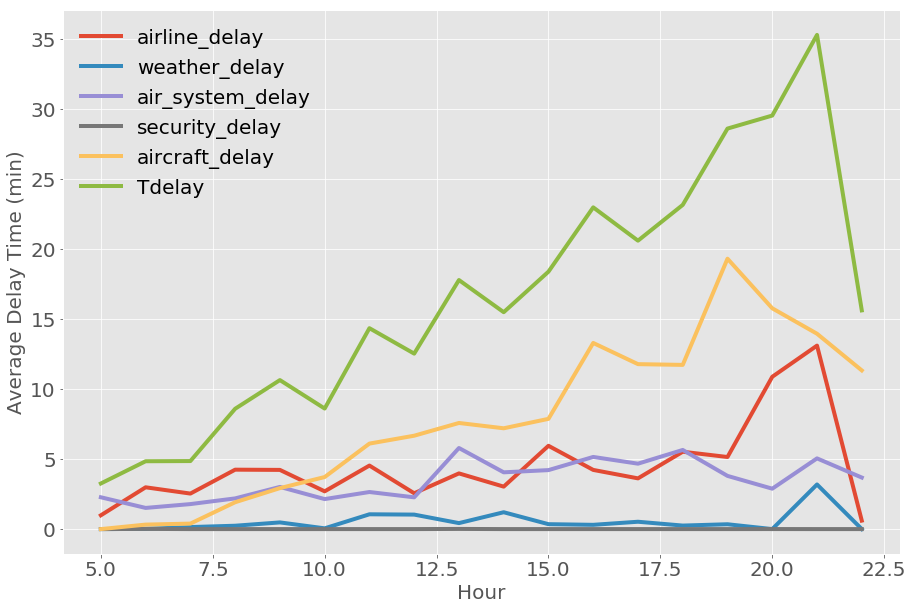

In [108]:
#[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1] 
Av_S_LGA =  delay_LGA.groupby('season')[cols].mean()
 
plt.figure( ); Av_S_LGA.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Season', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])



Av_M_LGA =  delay_LGA.groupby('month')[cols].mean()
 
plt.figure( ); Av_M_LGA.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Month', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
 
    
Av_D_LGA =  delay_LGA.groupby('weekdayN')[cols].mean()
 
plt.figure( ); Av_D_LGA.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xlabel('Day', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
plt.xticks(range(1,8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])    
    
    

Av_H_LGA =  delay_LGA.groupby('hour')[cols].mean()
 
plt.figure( ); Av_H_LGA.plot(figsize=(15,10), fontsize =20,linewidth=4); plt.legend( loc='upper left', frameon=False, fontsize =20)# ratio
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
 

# ONLY TOTAL DELAY

Text(0, 0.5, 'Delay Percentage')

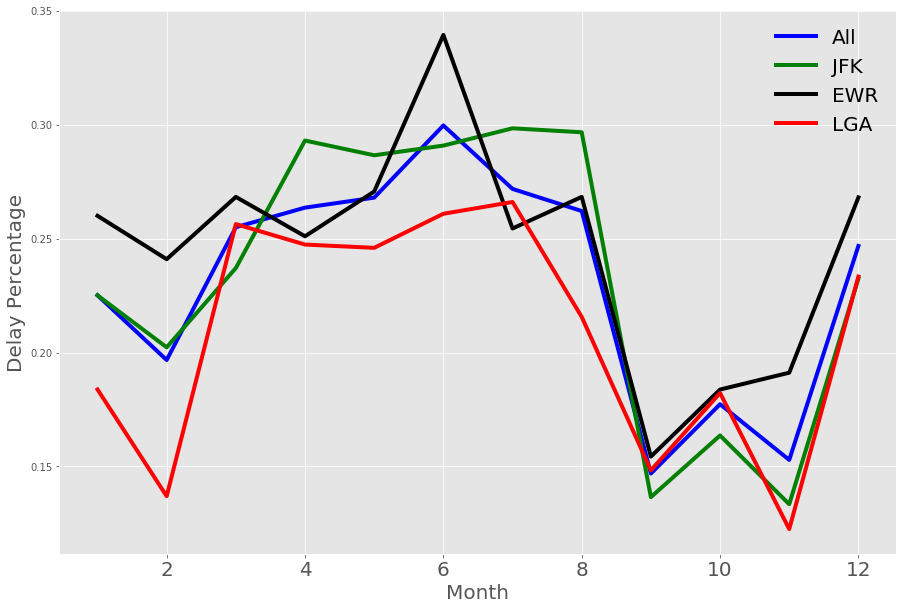

In [120]:
plt.figure( figsize=(15,10) ); 
plt.plot(  Freq_M['Tdelay'], marker='',   color='blue', linewidth=4,label='All' )
plt.plot( Freq_M_JFK['Tdelay'], marker='', color='green', linewidth=4,label='JFK')
plt.plot( Freq_M_EWR['Tdelay'] ,   marker='', color='black', linewidth=4, label="EWR")
plt.plot(  Freq_M_LGA['Tdelay'], marker='',   color='red', linewidth=4,label='LGA')

plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xticks(fontsize=20 )
plt.xlabel('Month', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)

([<matplotlib.axis.XTick at 0x26c54828>,
 <a list of 4 Text xticklabel objects>)

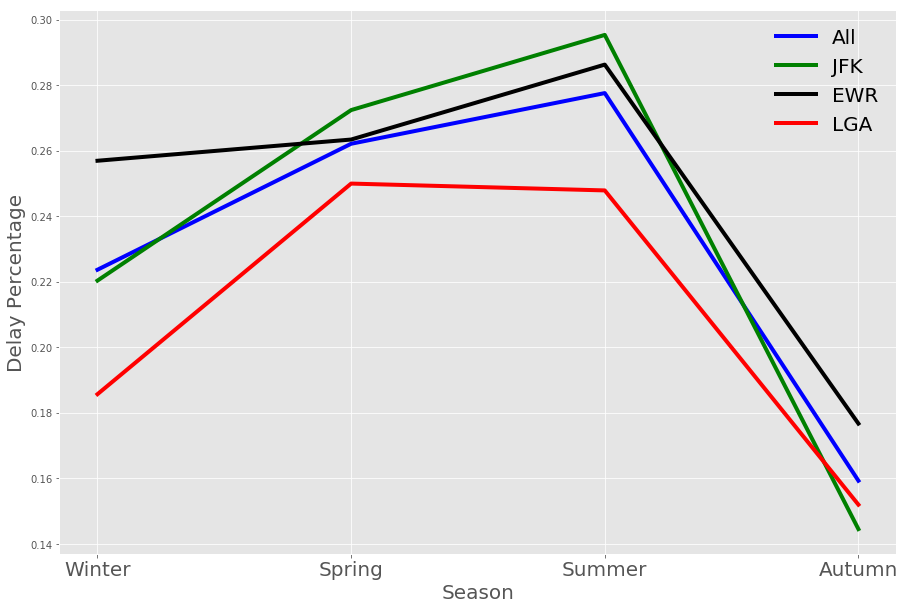

In [121]:
plt.figure( figsize=(15,10) ); 
plt.plot(  Freq_S['Tdelay'], marker='',   color='blue', linewidth=4,label='All' )
plt.plot( Freq_S_JFK['Tdelay'], marker='', color='green', linewidth=4,label='JFK')
plt.plot( Freq_S_EWR['Tdelay'] ,   marker='', color='black', linewidth=4, label="EWR")
plt.plot(  Freq_S_LGA['Tdelay'], marker='',   color='red', linewidth=4,label='LGA')

plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xticks(fontsize=20 )
plt.xlabel('Season', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])

([<matplotlib.axis.XTick at 0x277ba4e0>,
 <a list of 7 Text xticklabel objects>)

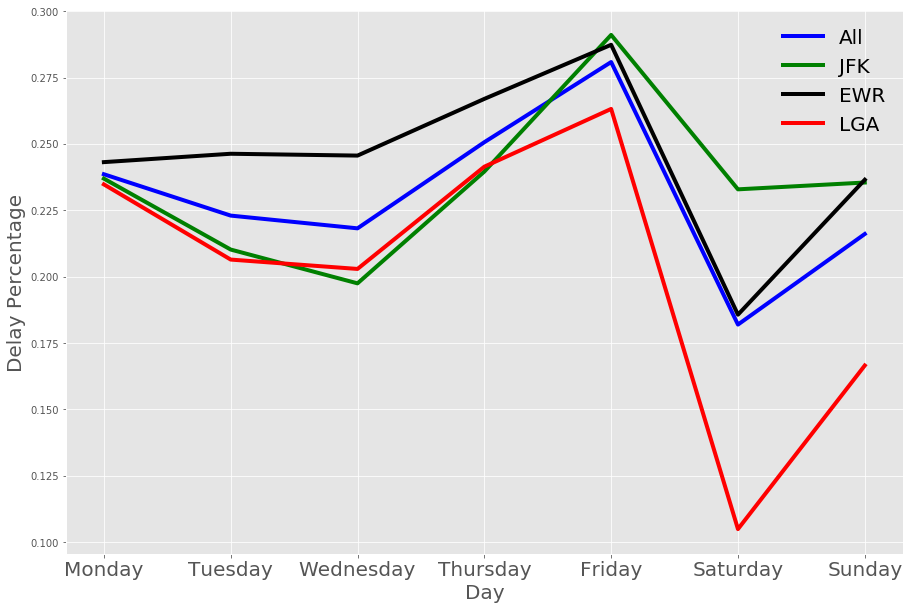

In [122]:
plt.figure( figsize=(15,10) ); 
plt.plot(  Freq_D['Tdelay'], marker='',   color='blue', linewidth=4,label='All' )
plt.plot( Freq_D_JFK['Tdelay'], marker='', color='green', linewidth=4,label='JFK')
plt.plot( Freq_D_EWR['Tdelay'] ,   marker='', color='black', linewidth=4, label="EWR")
plt.plot(  Freq_D_LGA['Tdelay'], marker='',   color='red', linewidth=4,label='LGA')

plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xticks(fontsize=20 )
plt.xlabel('Day', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)
plt.xticks(range(1,8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


Text(0, 0.5, 'Delay Percentage')

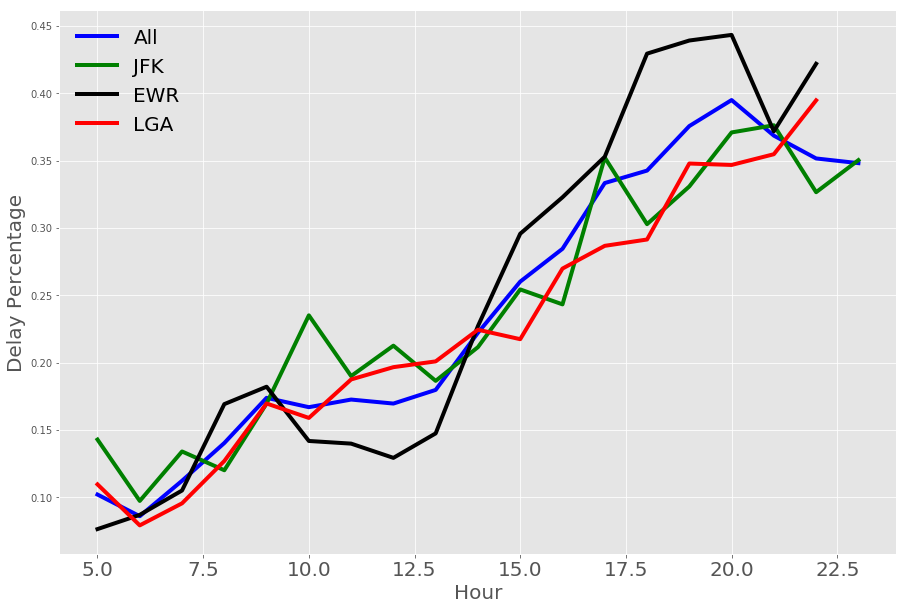

In [124]:
plt.figure( figsize=(15,10) ); 
plt.plot(  Freq_H['Tdelay'], marker='',   color='blue', linewidth=4,label='All' )
plt.plot( Freq_H_JFK['Tdelay'], marker='', color='green', linewidth=4,label='JFK')
plt.plot( Freq_H_EWR['Tdelay'] ,   marker='', color='black', linewidth=4, label="EWR")
plt.plot(  Freq_H_LGA['Tdelay'], marker='',   color='red', linewidth=4,label='LGA')

plt.legend( loc='upper left', frameon=False, fontsize =20)# ratio
plt.xticks(fontsize=20 )
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Delay Percentage', fontsize=20)


Text(0, 0.5, 'Average Delay Time (min)')

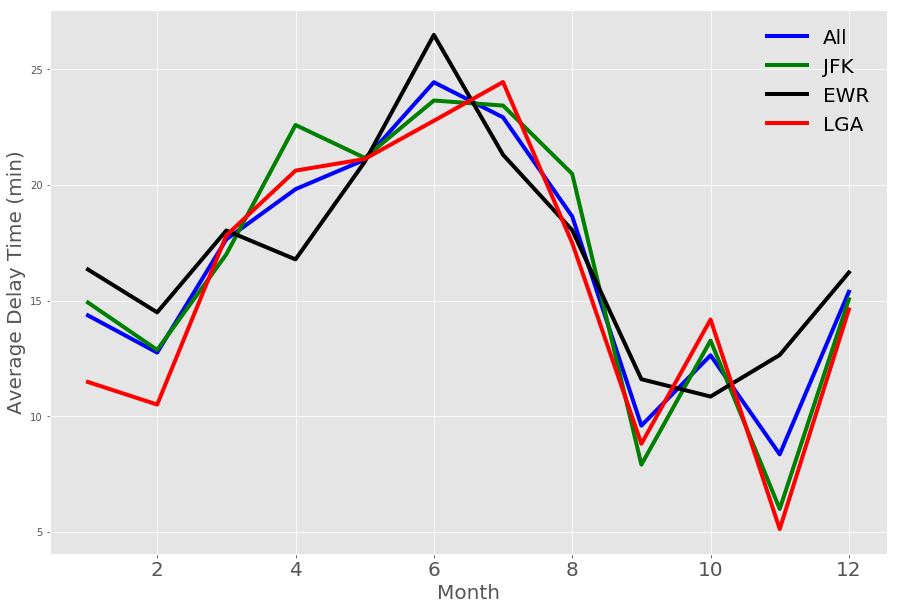

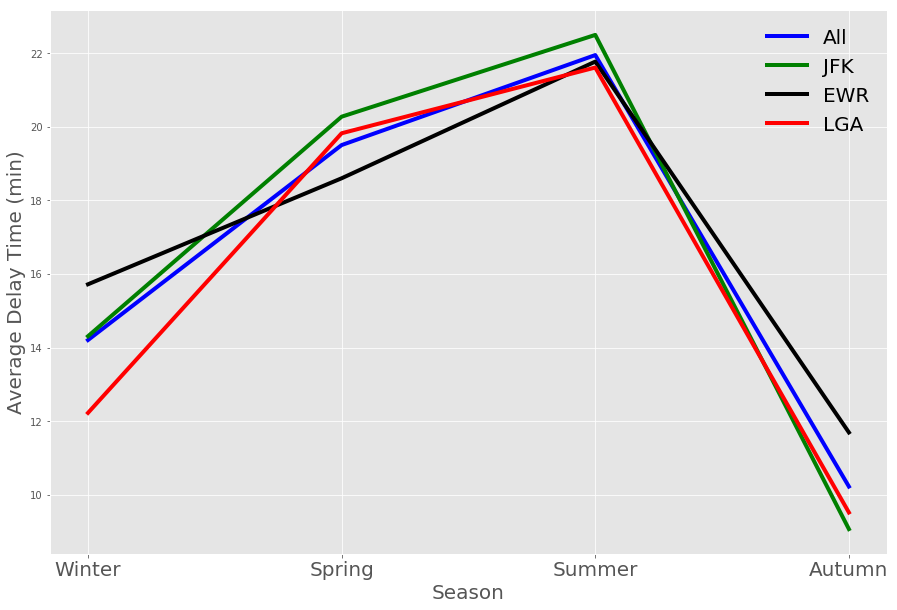

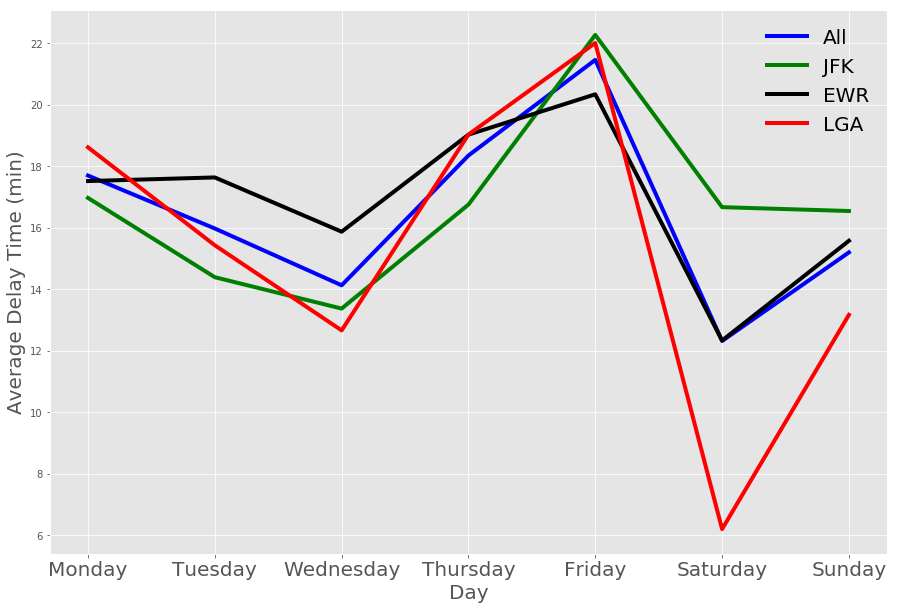

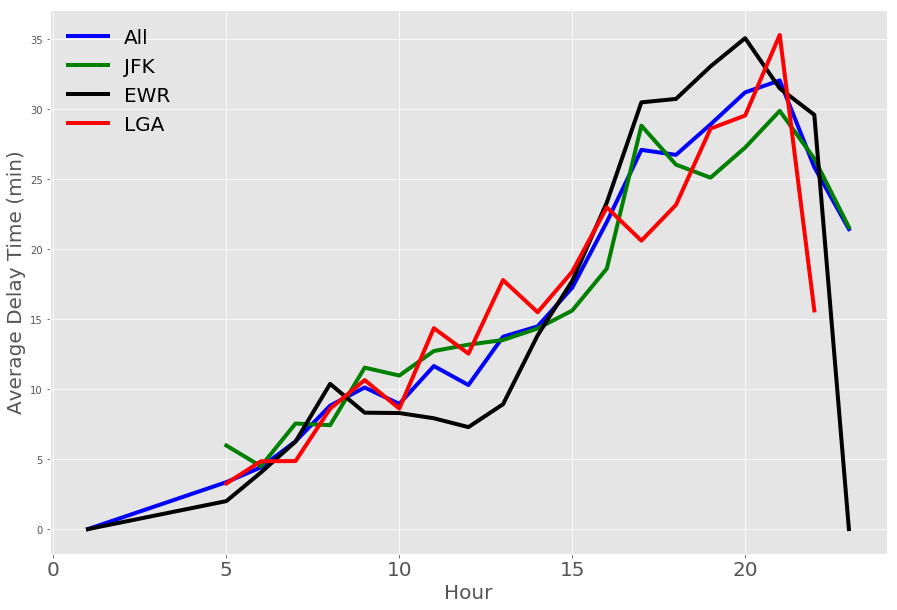

In [125]:
plt.figure( figsize=(15,10) ); 
plt.plot(  Av_M['Tdelay'], marker='',   color='blue', linewidth=4,label='All' )
plt.plot( Av_M_JFK['Tdelay'], marker='', color='green', linewidth=4,label='JFK')
plt.plot( Av_M_EWR['Tdelay'] ,   marker='', color='black', linewidth=4, label="EWR")
plt.plot(  Av_M_LGA['Tdelay'], marker='',   color='red', linewidth=4,label='LGA')

plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xticks(fontsize=20 )
plt.xlabel('Month', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)






plt.figure( figsize=(15,10) ); 
plt.plot(  Av_S['Tdelay'], marker='',   color='blue', linewidth=4,label='All' )
plt.plot( Av_S_JFK['Tdelay'], marker='', color='green', linewidth=4,label='JFK')
plt.plot( Av_S_EWR['Tdelay'] ,   marker='', color='black', linewidth=4, label="EWR")
plt.plot(  Av_S_LGA['Tdelay'], marker='',   color='red', linewidth=4,label='LGA')

plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xticks(fontsize=20 )
plt.xlabel('Season', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
plt.xticks(range(1,5), ['Winter','Spring','Summer','Autumn'])



plt.figure( figsize=(15,10) ); 
plt.plot(  Av_D['Tdelay'], marker='',   color='blue', linewidth=4,label='All' )
plt.plot( Av_D_JFK['Tdelay'], marker='', color='green', linewidth=4,label='JFK')
plt.plot( Av_D_EWR['Tdelay'] ,   marker='', color='black', linewidth=4, label="EWR")
plt.plot(  Av_D_LGA['Tdelay'], marker='',   color='red', linewidth=4,label='LGA')

plt.legend( loc='upper right', frameon=False, fontsize =20)# ratio
plt.xticks(fontsize=20 )
plt.xlabel('Day', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
plt.xticks(range(1,8), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])





plt.figure( figsize=(15,10) ); 
plt.plot(  Av_H['Tdelay'], marker='',   color='blue', linewidth=4,label='All' )
plt.plot( Av_H_JFK['Tdelay'], marker='', color='green', linewidth=4,label='JFK')
plt.plot( Av_H_EWR['Tdelay'] ,   marker='', color='black', linewidth=4, label="EWR")
plt.plot(  Av_H_LGA['Tdelay'], marker='',   color='red', linewidth=4,label='LGA')

plt.legend( loc='upper left', frameon=False, fontsize =20)# ratio
plt.xticks(fontsize=20 )
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Average Delay Time (min)', fontsize=20)
